In [ ]:
import pandas as pd
import numpy as np

In [ ]:

# Use pd.read_excel to read the Excel file
df = pd.read_excel('/content/Copy of customer_transactions_sample.xlsx')



In [ ]:
df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
525456 2010-12-09 20:01:00   2.95      17530.0  United Kingdom  
525457 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525458 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525459 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525460 2010-12-09 20:01:00   1.95      17530.0  United Kingdom  

[525461 rows x 8 columns]

In [ ]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

Invoice StockCode                Description  Quantity  \
263     489464     21733               85123a mixed       -96   
283     489463     71477                      short      -240   
284     489467    85123A                21733 mixed      -192   
470     489521     21646                        NaN       -50   
577     489525    85226C  BLUE PULL BACK RACING CAR         1   
...        ...       ...                        ...       ...   
525231  538159     21324                        NaN       -18   
525232  538158     20892                        NaN       -32   
525233  538160     20956                        NaN       288   
525234  538161    46000S               Dotcom sales      -100   
525235  538162    46000M               Dotcom sales      -100   

               InvoiceDate  Price  Customer ID         Country  
263    2009-12-01 10:52:00   0.00          NaN  United Kingdom  
283    2009-12-01 10:52:00   0.00          NaN  United Kingdom  
284    2009-12-01 10:53:00   0.00          NaN  United Kingdom  
470    2009-12-01 11:44:00   0.00          NaN  United Kingdom  
577    2009-12-01 11:49:00   0.55          NaN  United Kingdom  
...                    ...    ...          ...             ...  
525231 2010-12-09 17:17:00   0.00          NaN  United Kingdom  
525232 2010-12-09 17:17:00   0.00          NaN  United Kingdom  
525233 2010-12-09 17:18:00   0.00          NaN  United Kingdom  
525234 2010-12-09 17:25:00   0.00          NaN  United Kingdom  
525235 2010-12-09 17:25:00   0.00          NaN  United Kingdom  

[107927 rows x 8 columns]

In [ ]:
df.columns.tolist()


['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country']

In [ ]:
df.shape

(525461, 8)

In [ ]:
df = df.dropna(subset=['Customer ID'])

In [ ]:
cleaned_df = df[~df['Invoice'].astype(str).str.startswith('C')]

In [ ]:
failed_trasaction_df = df[df['Invoice'].astype(str).str.startswith('C')]

In [ ]:

cleaned_df.loc[:, 'InvoiceDate'] = pd.to_datetime(cleaned_df['InvoiceDate'])
cleaned_df.loc[:,'DATE'] = cleaned_df['InvoiceDate'].dt.date

<ipython-input-17-81ceefc5eb56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.loc[:,'DATE'] = cleaned_df['InvoiceDate'].dt.date


In [ ]:
cleaned_df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country        DATE  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009-12-01  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009-12-01  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009-12-01  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009-12-01  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009-12-01  
...                    ...    ...          ...             ...         ...  
525456 2010-12-09 20:01:00   2.95      17530.0  United Kingdom  2010-12-09  
525457 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  2010-12-09  
525458 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  2010-12-09  
525459 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  2010-12-09  
525460 2010-12-09 20:01:00   1.95      17530.0  United Kingdom  2010-12-09  

[407695 rows x 9 columns]

# Marketing

In [ ]:
from datetime import datetime

date = cleaned_df['InvoiceDate'].max()+ pd.DateOffset(days=1)

# Calculate RFM metrics
rfm = cleaned_df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (date - x.max()).days,
    'Invoice': 'count',
    'Price': lambda x: sum(x * cleaned_df.loc[x.index, 'Quantity'])
}).reset_index()
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']


In [ ]:
rfm

Customer ID  Recency  Frequency  Monetary
0         12346.0      165         33    372.86
1         12347.0        3         71   1323.32
2         12348.0       74         20    222.16
3         12349.0       43        102   2671.14
4         12351.0       11         21    300.93
...           ...      ...        ...       ...
4309      18283.0       18        230    641.77
4310      18284.0       67         28    461.68
4311      18285.0      296         12    427.00
4312      18286.0      112         67   1296.43
4313      18287.0       18         85   2345.71

[4314 rows x 4 columns]

In [ ]:
# Create a new dataframe with only Customer ID and Recency columns
rfm_recency = rfm[['Customer ID', 'Recency']]
rfm_recency

Customer ID  Recency
0         12346.0      165
1         12347.0        3
2         12348.0       74
3         12349.0       43
4         12351.0       11
...           ...      ...
4309      18283.0       18
4310      18284.0       67
4311      18285.0      296
4312      18286.0      112
4313      18287.0       18

[4314 rows x 2 columns]

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt




In [ ]:
# Assuming rfm is your DataFrame
# Standardize Recency
scaler = StandardScaler()
rfm_recency['Recency_Scaled'] = scaler.fit_transform(rfm_recency[['Recency']])

<ipython-input-23-eeb2c80f37fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_recency['Recency_Scaled'] = scaler.fit_transform(rfm_recency[['Recency']])


In [ ]:
rfm_recency

Customer ID  Recency  Recency_Scaled  Recency_Cluster  \
0         12346.0      165        0.760643                3   
1         12347.0        3       -0.910627                0   
2         12348.0       74       -0.178157                2   
3         12349.0       43       -0.497968                0   
4         12351.0       11       -0.828095                0   
...           ...      ...             ...              ...   
4309      18283.0       18       -0.755880                0   
4310      18284.0       67       -0.250372                2   
4311      18285.0      296        2.112103                1   
4312      18286.0      112        0.213870                2   
4313      18287.0       18       -0.755880                0   

     Recency_Cluster_Label  
0         Occasional_Buyer  
1             Recent_Buyer  
2          Potential_Buyer  
3             Recent_Buyer  
4             Recent_Buyer  
...                    ...  
4309          Recent_Buyer  
4310       Potential_Buyer  
4311         Long Time Ago  
4312       Potential_Buyer  
4313          Recent_Buyer  

[4314 rows x 5 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

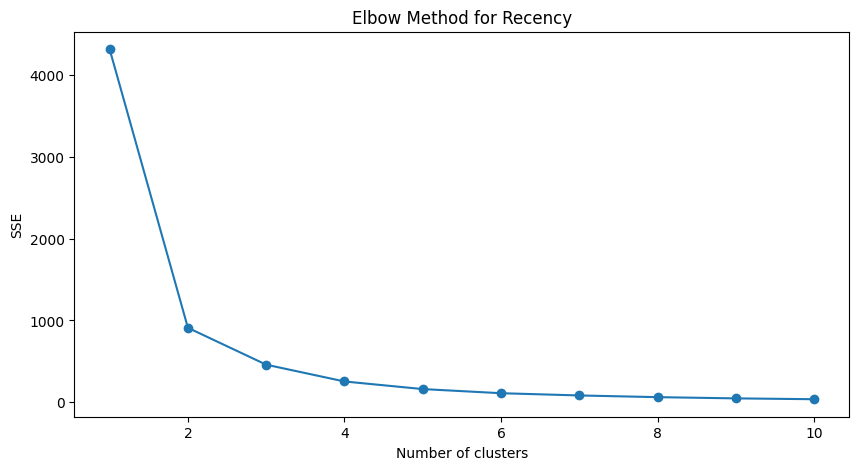

In [ ]:
# Determine optimal number of clusters using Elbow Method for Recency
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_recency[['Recency_Scaled']])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Recency')
plt.show()



In [ ]:
# Apply K-means clustering
optimal_clusters = 4  # Choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm_recency['Recency_Cluster'] = kmeans.fit_predict(rfm_recency[['Recency_Scaled']])

# Define cluster labels for Recency
rfm_recency['Recency_Cluster_Label'] = rfm_recency['Recency_Cluster'].map({
    0: 'Recent_Buyer',
    1: 'Long Time Ago',
    2: 'Potential_Buyer',
    3: 'Occasional_Buyer'
})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-49-7f9bcc268c1c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Recency', y='Recency_Cluster_Label', data=rfm_recency, palette='viridis')


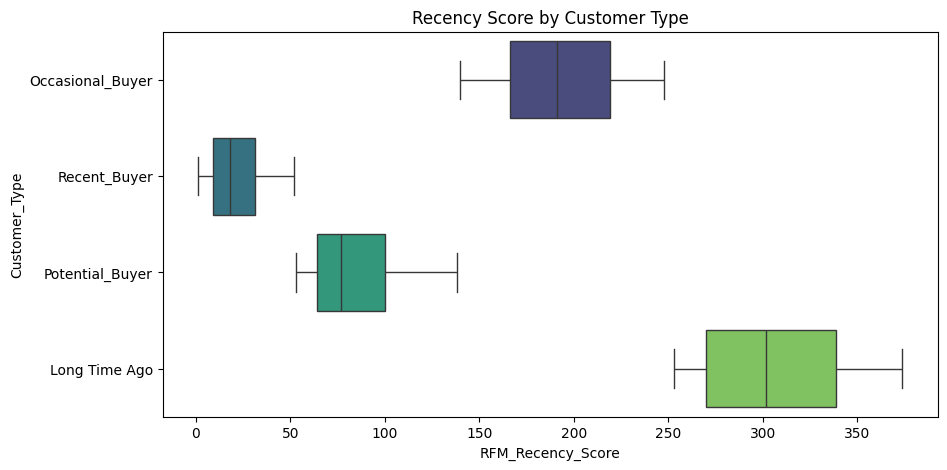

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns# Visualization of Recency Score by Recency Cluster
plt.figure(figsize=(10, 5))
sns.boxplot(x='Recency', y='Recency_Cluster_Label', data=rfm_recency, palette='viridis')
plt.title('Recency Score by Customer Type')
plt.xlabel('RFM_Recency_Score')
plt.ylabel('Customer_Type')
plt.show()

<ipython-input-51-34aeb95b5755>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Recency_Cluster_Label', x='Count', data=recency_counts, palette='viridis')


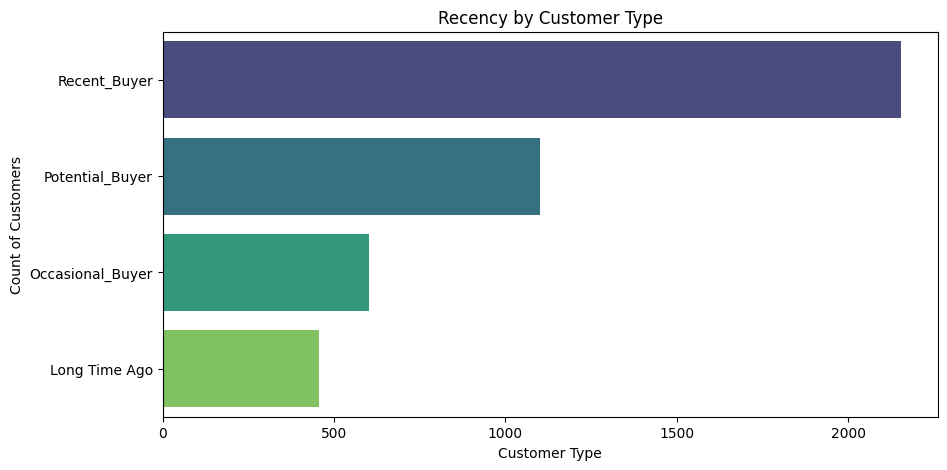

In [ ]:
# Visualization of Recency by Customer Type
recency_counts = rfm_recency['Recency_Cluster_Label'].value_counts().reset_index()
recency_counts.columns = ['Recency_Cluster_Label', 'Count']

plt.figure(figsize=(10, 5))
sns.barplot(y='Recency_Cluster_Label', x='Count', data=recency_counts, palette='viridis')
plt.title('Recency by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count of Customers')
plt.show()

In [ ]:
# List of recent buyers with sales details
recent_buyers = rfm_recency[rfm_recency['Recency_Cluster_Label'] == 'Recent_Buyer']
recent_buyers_sales = rfm.merge(recent_buyers[['Customer ID']], on='Customer ID', how='inner')[['Customer ID', 'Frequency', 'Monetary']]
recent_buyers_sales

Customer ID  Frequency  Monetary
0         12347.0         71   1323.32
1         12349.0        102   2671.14
2         12351.0         21    300.93
3         12352.0         18    343.80
4         12353.0         20    317.76
...           ...        ...       ...
2148      18277.0         56   1069.67
2149      18278.0         15    240.30
2150      18280.0         20    307.55
2151      18283.0        230    641.77
2152      18287.0         85   2345.71

[2153 rows x 3 columns]

In [ ]:
# Sort the recent_buyers_sales DataFrame by Monetary in descending order
top_10_recent_buyers_monetary = recent_buyers_sales.sort_values(by='Monetary', ascending=False).head(10)

# Reset the index and display the top 10 DataFrame
top_10_recent_buyers_monetary = top_10_recent_buyers_monetary.reset_index(drop=True)
top_10_recent_buyers_monetary

Customer ID  Frequency   Monetary
0      18102.0        627  349164.35
1      14646.0       1774  248396.50
2      14156.0       2648  196566.74
3      14911.0       5570  152147.57
4      13694.0        957  131443.19
5      17511.0        948   84541.17
6      15061.0        584   83284.38
7      16684.0        441   80489.21
8      16754.0        140   65500.07
9      17949.0         87   60117.60

In [ ]:
# Sort the recent_buyers_sales DataFrame by frequency in descending order
top_10_recent_buyers_frquency = recent_buyers_sales.sort_values(by='Frequency', ascending=False).head(10)

# Reset the index and display the top 10 DataFrame
top_10_recent_buyers_frquency =top_10_recent_buyers_frquency.reset_index(drop=True)
top_10_recent_buyers_frquency

Customer ID  Frequency   Monetary
0      14911.0       5570  152147.57
1      17841.0       5043   29892.50
2      14606.0       3866   18704.41
3      14156.0       2648  196566.74
4      12748.0       2634   22879.66
5      17850.0       2499   51208.87
6      16549.0       2269    9027.55
7      15311.0       2055   56003.26
8      14646.0       1774  248396.50
9      14527.0       1729   19283.48

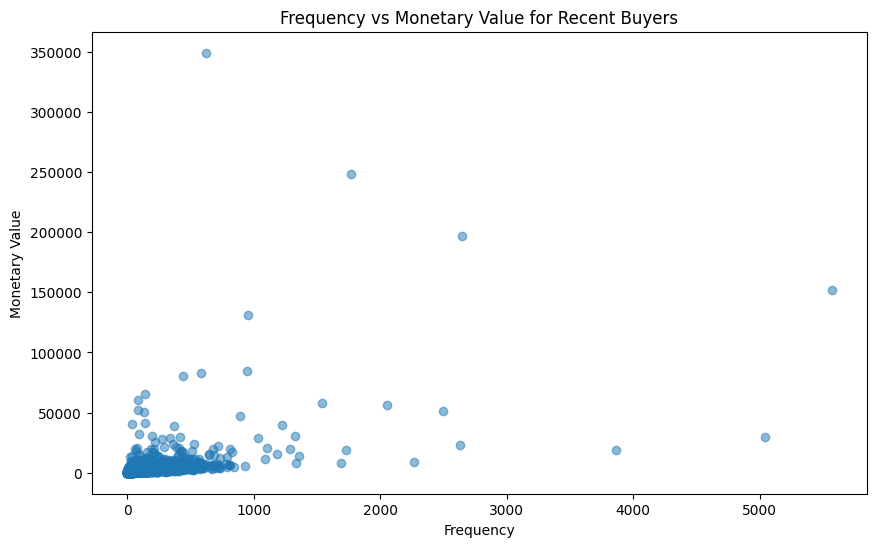

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(recent_buyers_sales['Frequency'], recent_buyers_sales['Monetary'], alpha=0.5)
plt.title('Frequency vs Monetary Value for Recent Buyers')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.show()

##Frequcy

In [ ]:
# Create a new dataframe with only Customer ID and frequency columns
rfm_frequency = rfm[['Customer ID', 'Frequency']]
rfm_frequency

Customer ID  Frequency
0         12346.0         33
1         12347.0         71
2         12348.0         20
3         12349.0        102
4         12351.0         21
...           ...        ...
4309      18283.0        230
4310      18284.0         28
4311      18285.0         12
4312      18286.0         67
4313      18287.0         85

[4314 rows x 2 columns]

In [ ]:
rfm_frequency.describe()

Customer ID    Frequency
count   4314.000000  4314.000000
mean   15348.880389    94.505100
std     1700.930104   202.020116
min    12346.000000     1.000000
25%    13883.250000    18.000000
50%    15348.500000    44.000000
75%    16833.750000   102.000000
max    18287.000000  5570.000000

<ipython-input-54-d8f5c1150df7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_frequency['Frequency_Scaled'] = scaler.fit_transform(rfm_frequency[['Frequency']])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will 

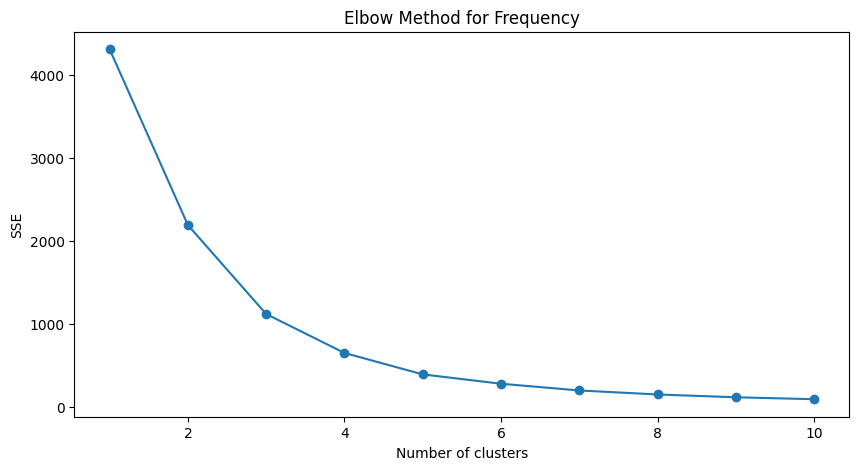

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Standardize Frequency
rfm_frequency['Frequency_Scaled'] = scaler.fit_transform(rfm_frequency[['Frequency']])

# Determine optimal number of clusters using Elbow Method for Frequency
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_frequency[['Frequency_Scaled']])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Frequency')
plt.show()

# Apply K-means clustering
optimal_clusters = 4  # Choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm_frequency['Frequency_Cluster'] = kmeans.fit_predict(rfm_frequency[['Frequency_Scaled']])

# Define cluster labels for Frequency
rfm_frequency['Frequency_Cluster_Label'] = rfm_frequency['Frequency_Cluster'].map({
    0: 'Look_out_Buyer',
    1: 'Occasional_Buyer',
    2: 'High_Potential_Buyer',
    3: 'Best_Customer(Loyal_customer)'
})




<ipython-input-55-3bc77c5a0914>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Frequency', y='Frequency_Cluster_Label', data=rfm_frequency, palette='viridis')


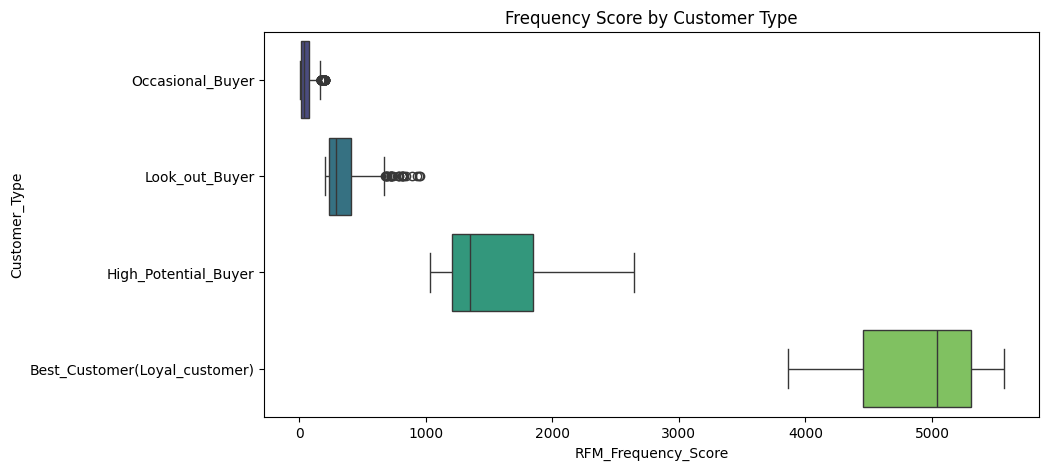

In [ ]:
# Visualization of frequency Score by frequency Cluster
plt.figure(figsize=(10, 5))
sns.boxplot(x='Frequency', y='Frequency_Cluster_Label', data=rfm_frequency, palette='viridis')
plt.title('Frequency Score by Customer Type')
plt.xlabel('RFM_Frequency_Score')
plt.ylabel('Customer_Type')
plt.show()

<ipython-input-56-bc91306484cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Frequency_Cluster_Label', data=rfm_frequency, palette='viridis')


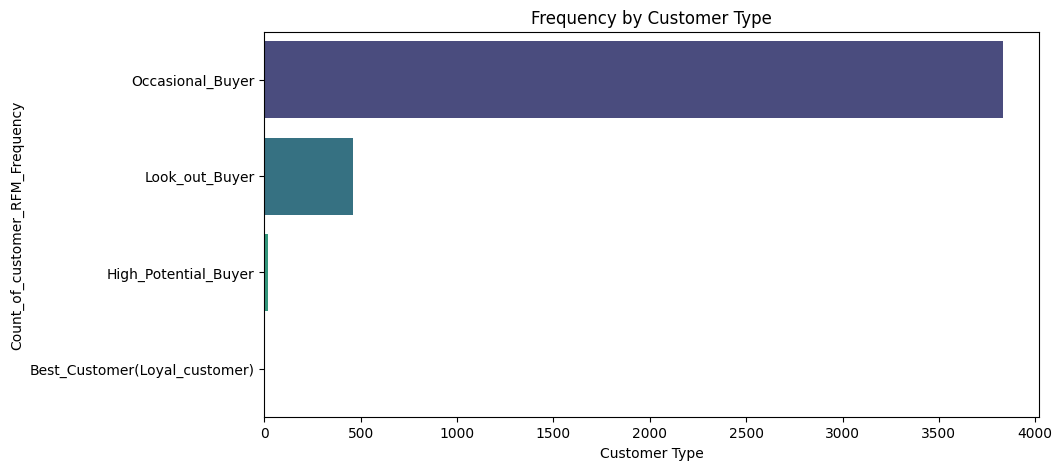

In [ ]:
# Visualization of Frequency by Customer Type
plt.figure(figsize=(10, 5))
sns.countplot(y='Frequency_Cluster_Label', data=rfm_frequency, palette='viridis')
plt.title('Frequency by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count_of_customer_RFM_Frequency')
plt.show()


In [ ]:
# Create a new dataframe with only Customer ID and frequency columns
rfm_monetary = rfm[['Customer ID', 'Monetary']]
rfm_monetary

Customer ID  Monetary
0         12346.0    372.86
1         12347.0   1323.32
2         12348.0    222.16
3         12349.0   2671.14
4         12351.0    300.93
...           ...       ...
4309      18283.0    641.77
4310      18284.0    461.68
4311      18285.0    427.00
4312      18286.0   1296.43
4313      18287.0   2345.71

[4314 rows x 2 columns]

In [ ]:
rfm_monetary.describe()

Customer ID       Monetary
count   4314.000000    4314.000000
mean   15348.880389    2047.288659
std     1700.930104    8912.523243
min    12346.000000       0.000000
25%    13883.250000     307.950000
50%    15348.500000     705.550000
75%    16833.750000    1722.802500
max    18287.000000  349164.350000

<ipython-input-59-9e8cbc36730a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_monetary['Monetary_Scaled'] = scaler.fit_transform(rfm_monetary[['Monetary']])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will chan

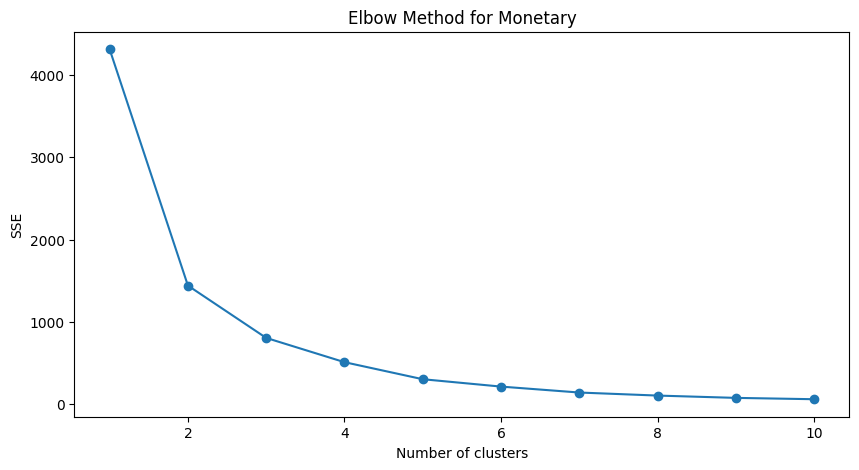

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Standardize Monetary
rfm_monetary['Monetary_Scaled'] = scaler.fit_transform(rfm_monetary[['Monetary']])

# Determine optimal number of clusters using Elbow Method for Monetary
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_monetary[['Monetary_Scaled']])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Monetary')
plt.show()

# Apply K-means clustering
optimal_clusters = 4  # Choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm_monetary['Monetary_Cluster'] = kmeans.fit_predict(rfm_monetary[['Monetary_Scaled']])

# Define cluster labels for Monetary
rfm_monetary['Monetary_Cluster_Label'] = rfm_monetary['Monetary_Cluster'].map({
    0: 'Medium_spender',
    1: 'Big_Spender',
    2: 'Low_Budget__Customer',
    3: 'Potential_Big_Spender'
})




<ipython-input-60-325e734e2444>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Monetary', y='Monetary_Cluster_Label', data=rfm_monetary, palette='viridis')


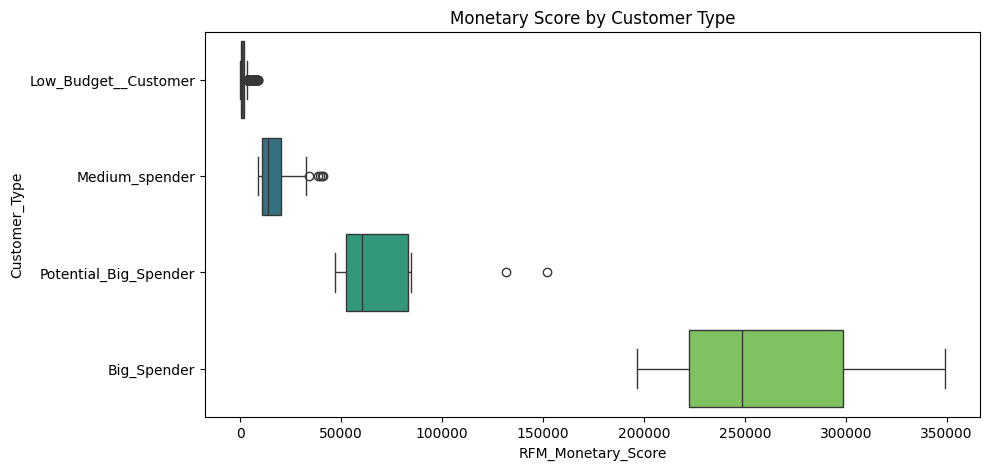

In [ ]:
# Visualization of monetary Score by monetary Cluster
plt.figure(figsize=(10, 5))
sns.boxplot(x='Monetary', y='Monetary_Cluster_Label', data=rfm_monetary, palette='viridis')
plt.title('Monetary Score by Customer Type')
plt.xlabel('RFM_Monetary_Score')
plt.ylabel('Customer_Type')
plt.show()

<ipython-input-61-d86bb5a375be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Monetary_Cluster_Label', data=rfm_monetary, palette='viridis')


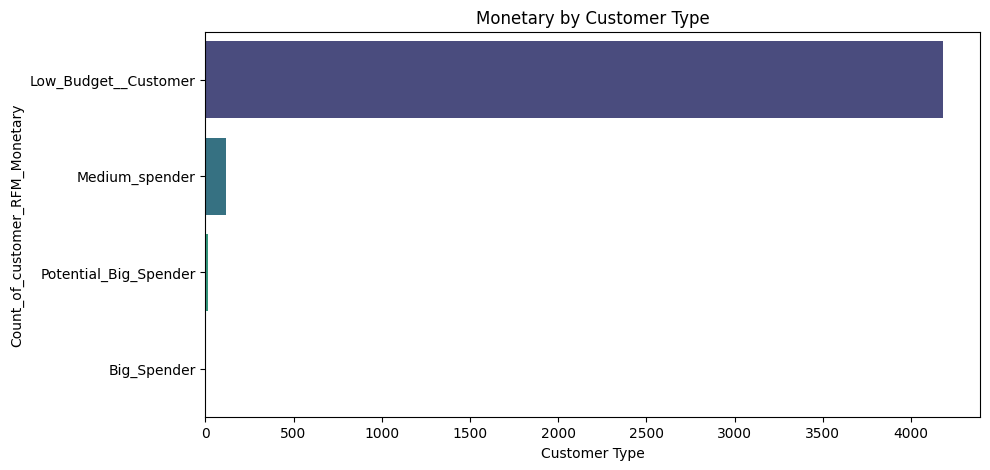

In [ ]:
# Visualization of Monetary by Customer Type
plt.figure(figsize=(10, 5))
sns.countplot(y='Monetary_Cluster_Label', data=rfm_monetary, palette='viridis')
plt.title('Monetary by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count_of_customer_RFM_Monetary')
plt.show()

# Operation

In [ ]:

cleaned_df.loc[:, 'Sales'] = cleaned_df['Quantity'] * cleaned_df['Price']
cleaned_df['DATE'] = pd.to_datetime(cleaned_df['DATE'])
cleaned_df

<ipython-input-62-02335fd37d5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.loc[:, 'Sales'] = cleaned_df['Quantity'] * cleaned_df['Price']
<ipython-input-62-02335fd37d5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['DATE'] = pd.to_datetime(cleaned_df['DATE'])


Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country       DATE  \
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom 2009-12-01   
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom 2009-12-01   
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom 2009-12-01   
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom 2009-12-01   
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom 2009-12-01   
...                    ...    ...          ...             ...        ...   
525456 2010-12-09 20:01:00   2.95      17530.0  United Kingdom 2010-12-09   
525457 2010-12-09 20:01:00   3.75      17530.0  United Kingdom 2010-12-09   
525458 2010-12-09 20:01:00   3.75      17530.0  United Kingdom 2010-12-09   
525459 2010-12-09 20:01:00   3.75      17530.0  United Kingdom 2010-12-09   
525460 2010-12-09 20:01:00   1.95      17530.0  United Kingdom 2010-12-09   

         Sales  
0        83.40  
1        81.00  
2        81.00  
3       100.80  
4        30.00  
...        ...  
525456    5.90  
525457    3.75  
525458    3.75  
525459    7.50  
525460    3.90  

[407695 rows x 10 columns]

In [ ]:
cleaned_df['DATE']

0        2009-12-01
1        2009-12-01
2        2009-12-01
3        2009-12-01
4        2009-12-01
            ...    
525456   2010-12-09
525457   2010-12-09
525458   2010-12-09
525459   2010-12-09
525460   2010-12-09
Name: DATE, Length: 407695, dtype: datetime64[ns]

In [ ]:

# Create a 'Month' column
cleaned_df['Month'] = cleaned_df['DATE'].dt.to_period('M')

# Aggregate sales data to monthly sales at the country level
monthly_sales = cleaned_df.groupby(['Month', 'Country'])['Sales'].sum().reset_index()

# Convert 'Month' back to datetime for plotting purposes
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Ensure all months are present for each country
all_months = pd.date_range(start=monthly_sales['Month'].min(), end=monthly_sales['Month'].max(), freq='MS')
monthly_sales_full = pd.DataFrame({'Month': all_months})

# Process each country separately
countries = monthly_sales['Country'].unique()

# Dictionary to store results
forecast_results = {}

for country in countries:
    # Filter data for the country
    country_sales = monthly_sales[monthly_sales['Country'] == country].set_index('Month')['Sales']

    # Merge to fill missing months with 0 sales
    country_sales_full = monthly_sales_full.merge(country_sales, on='Month', how='left').fillna(0).set_index('Month')

    forecast_results[country] = country_sales_full



<ipython-input-64-3cd46c55654c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Month'] = cleaned_df['DATE'].dt.to_period('M')


In [ ]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')
def fit_sarimax(data, forecast_steps=3):
    # Apply log transformation to handle negative forecasts (optional, if needed)
    data_log = np.log1p(data)

    # Fit SARIMA model
    model = SARIMAX(data_log, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    result = model.fit()

    # Forecast
    forecast = result.get_forecast(steps=forecast_steps)
    forecast_df = forecast.summary_frame()

    # Convert forecast back from log scale (if applied)
    forecast_df['mean'] = np.expm1(forecast_df['mean'])
    forecast_df['mean_ci_lower'] = np.expm1(forecast_df['mean_ci_lower'])
    forecast_df['mean_ci_upper'] = np.expm1(forecast_df['mean_ci_upper'])

    # Generate monthly forecast
    forecast_df['Month'] = pd.date_range(start=data.index[-1] + pd.offsets.MonthBegin(), periods=forecast_steps, freq='MS')
    forecast_df.set_index('Month', inplace=True)

    return forecast_df


# Apply the function to each country's data
for country, data in forecast_results.items():
    forecast_df = fit_sarimax(data['Sales'], forecast_steps=3)
    forecast_results[country] = (data, forecast_df)




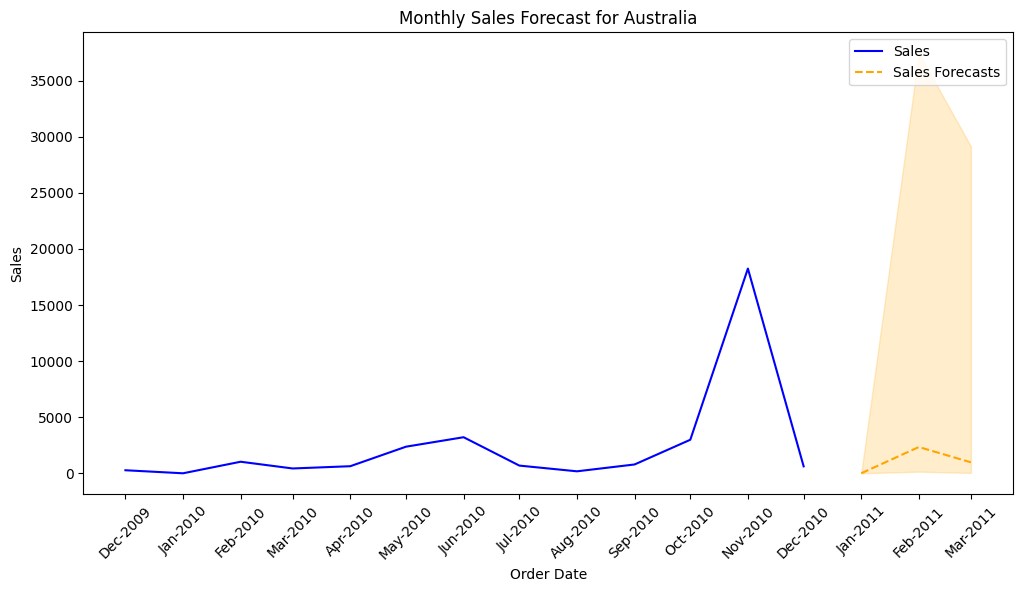

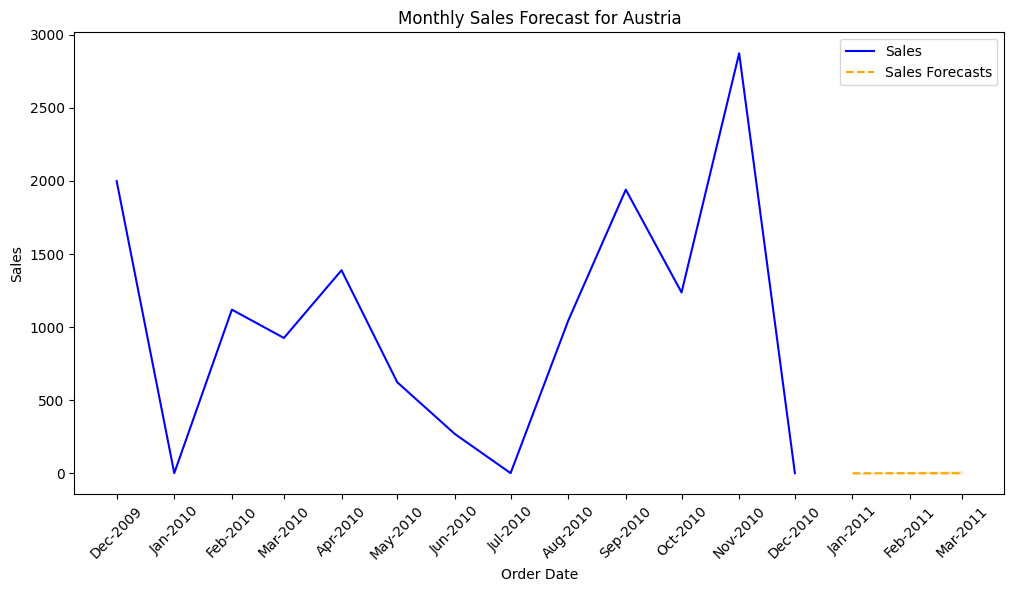

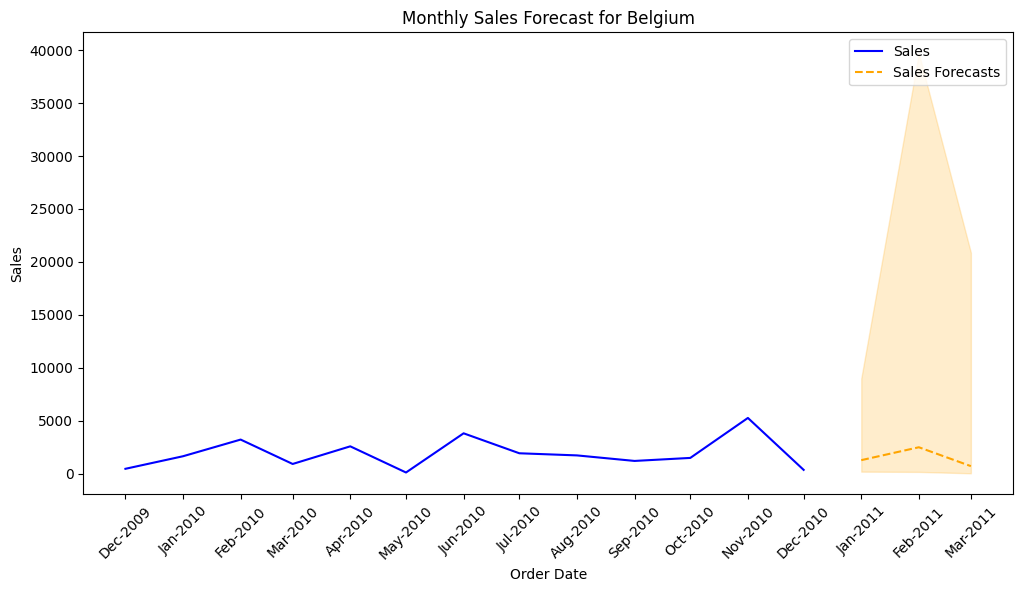

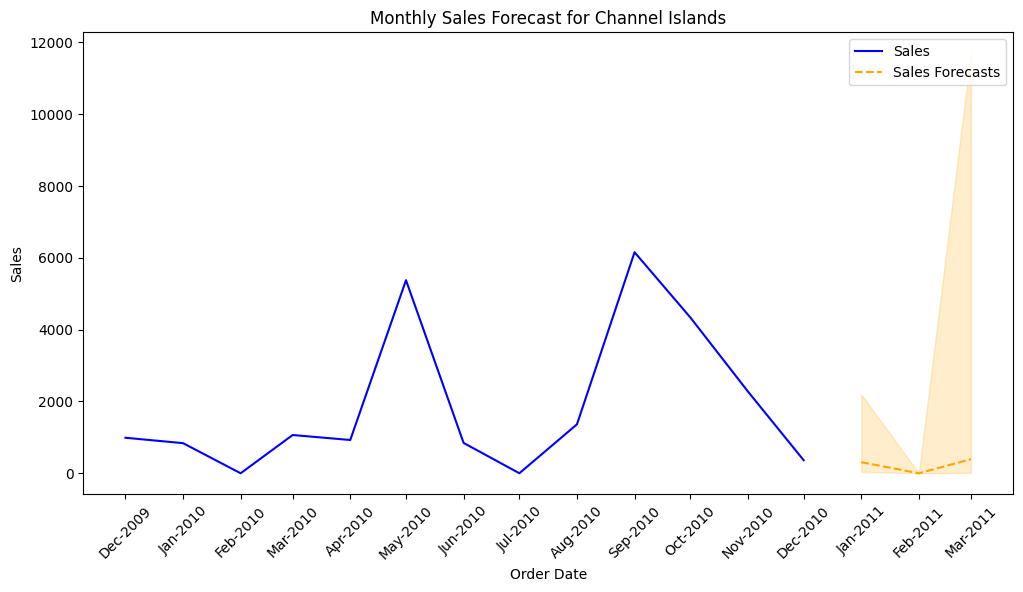

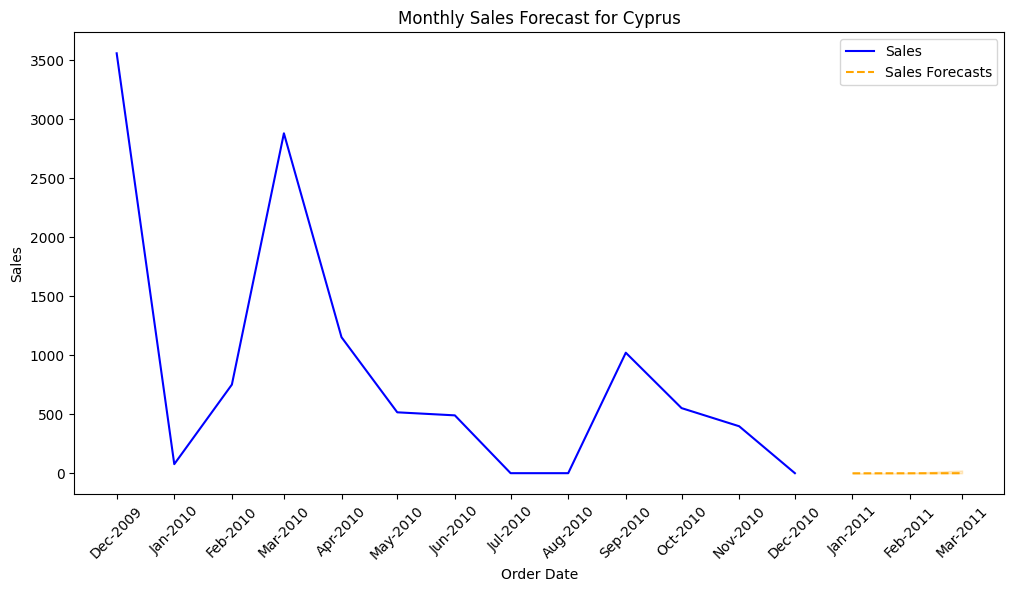

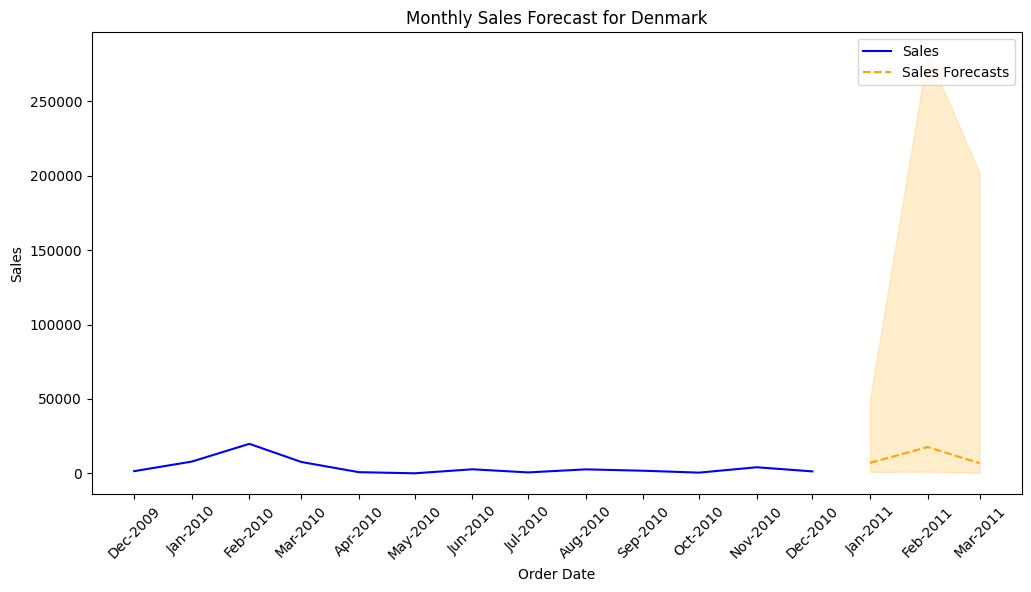

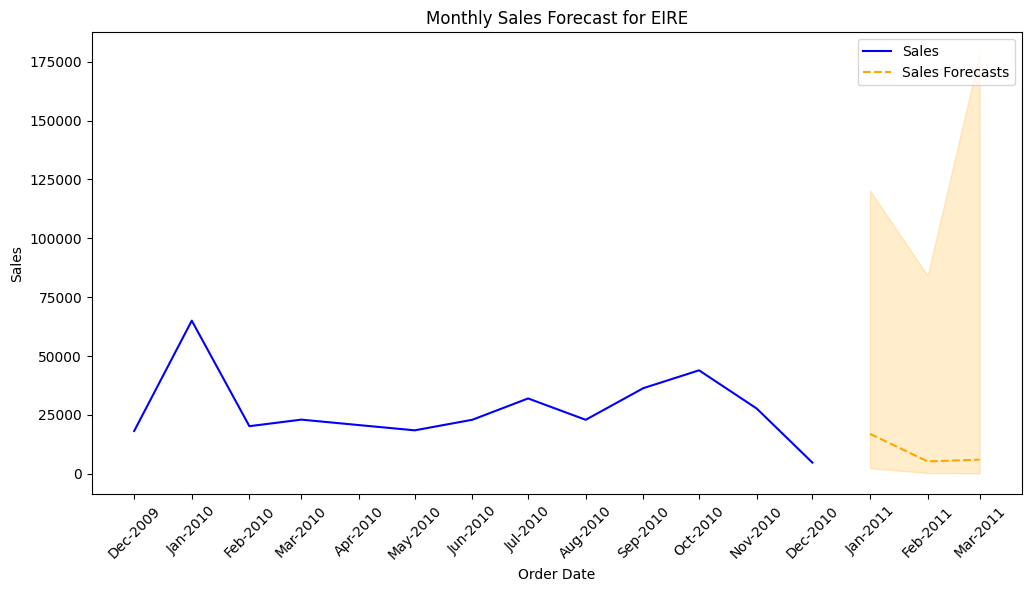

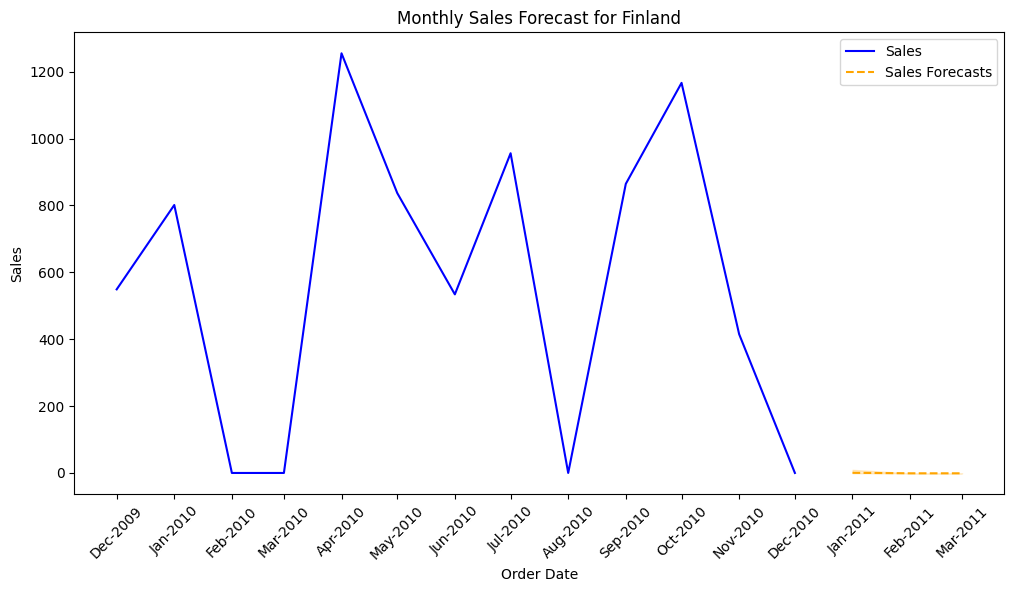

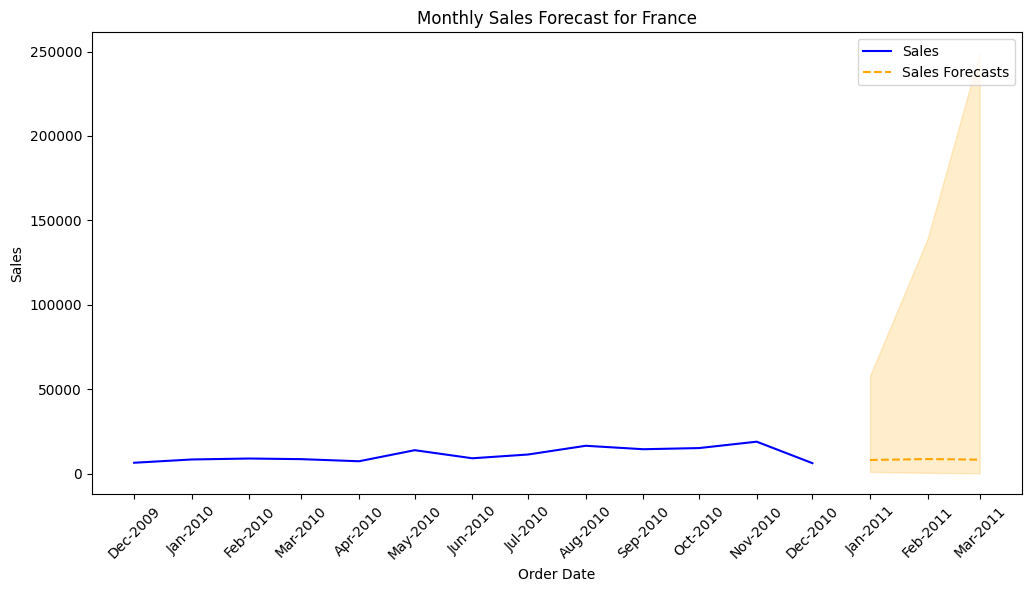

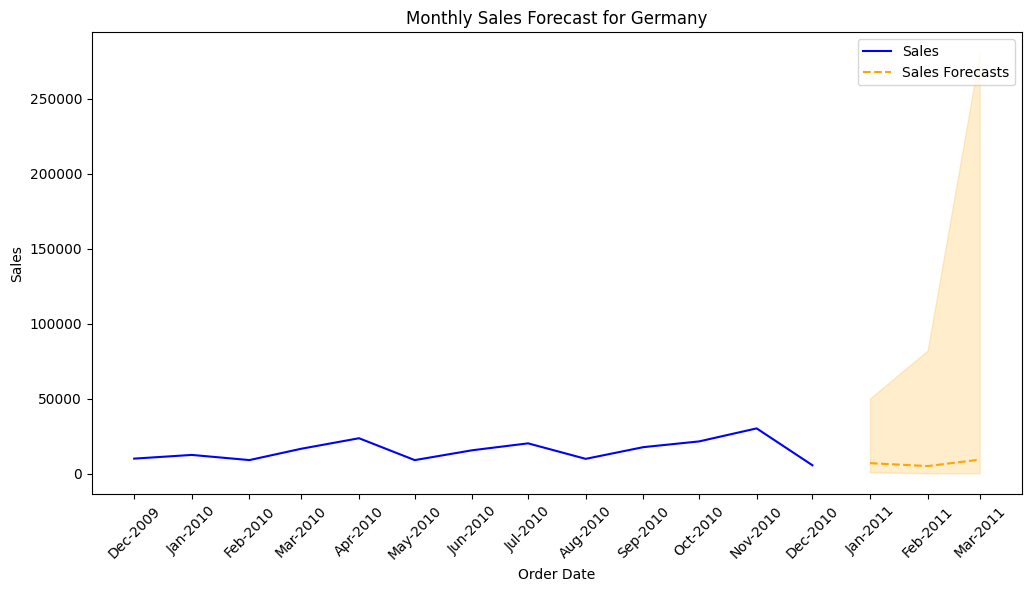

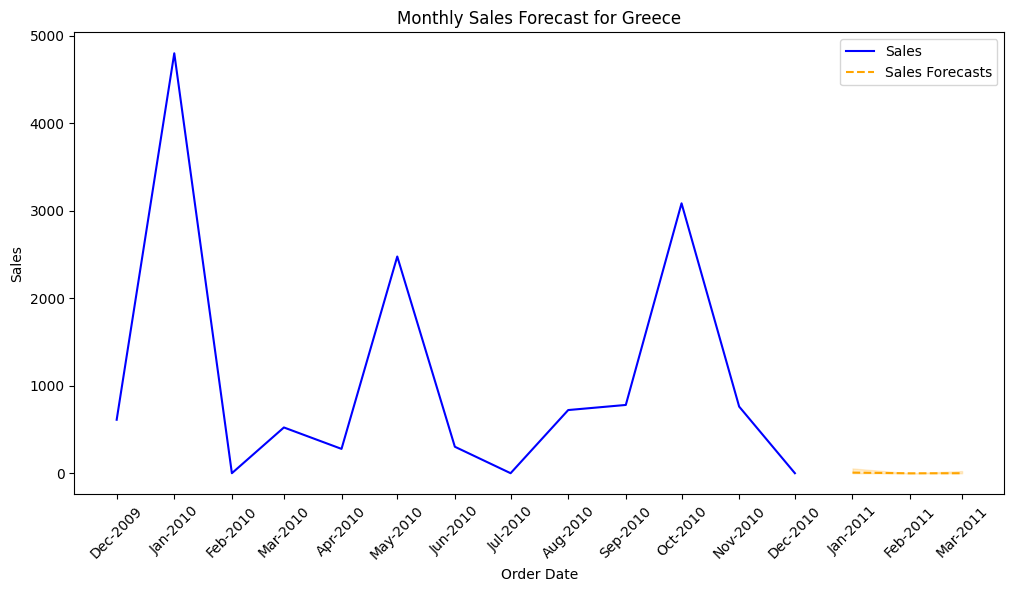

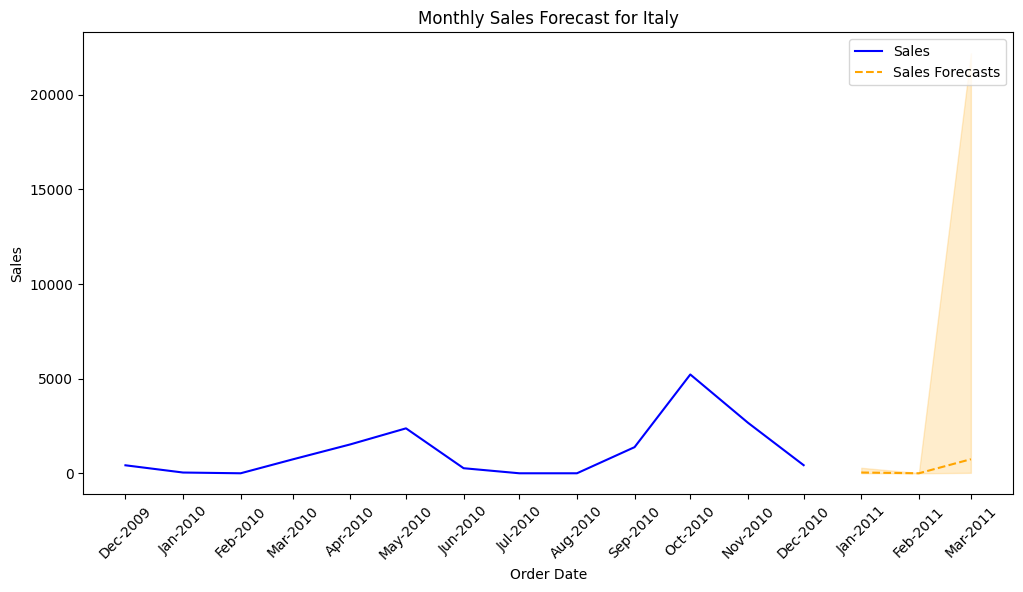

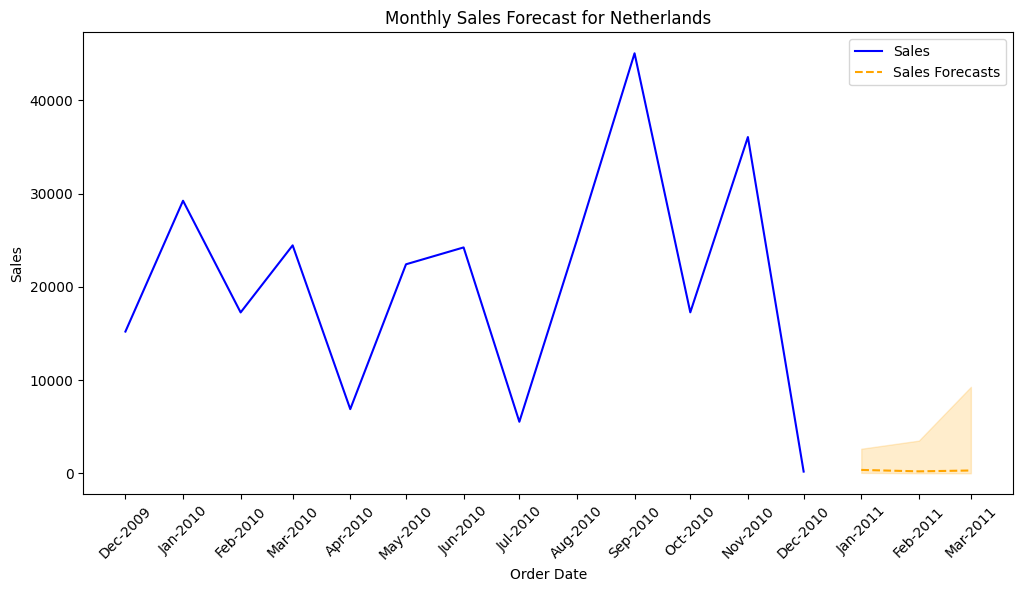

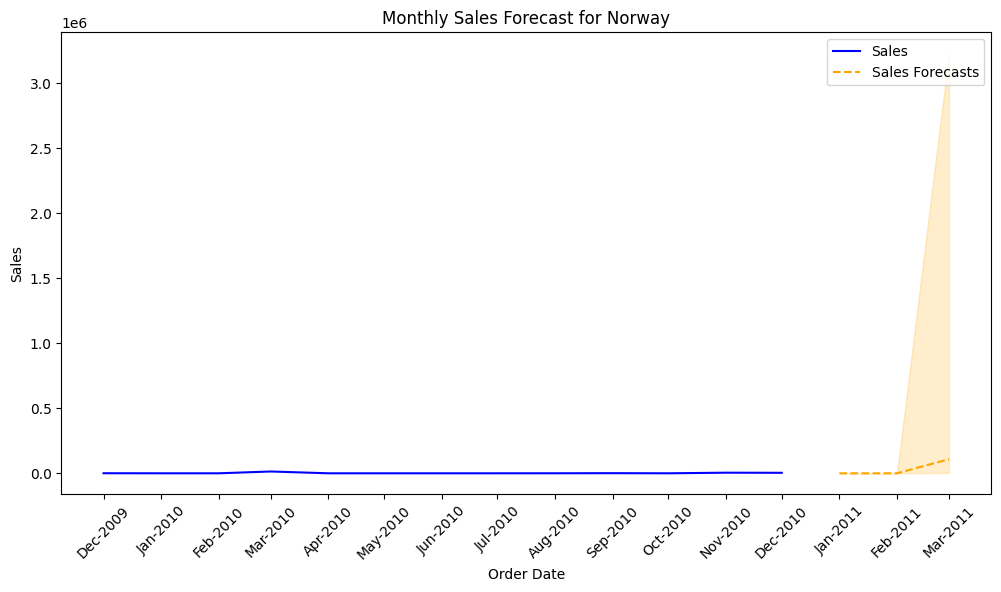

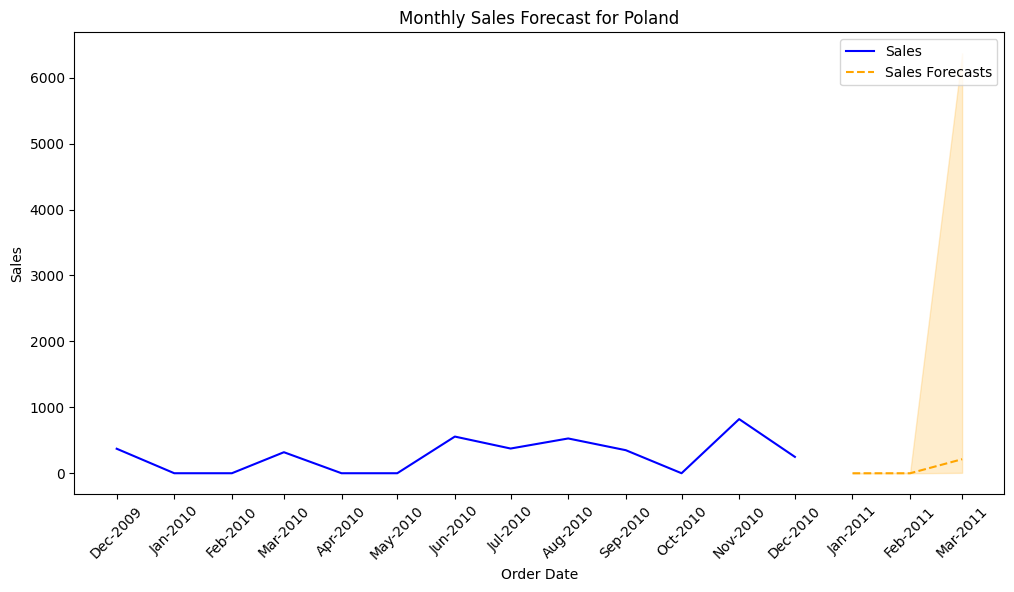

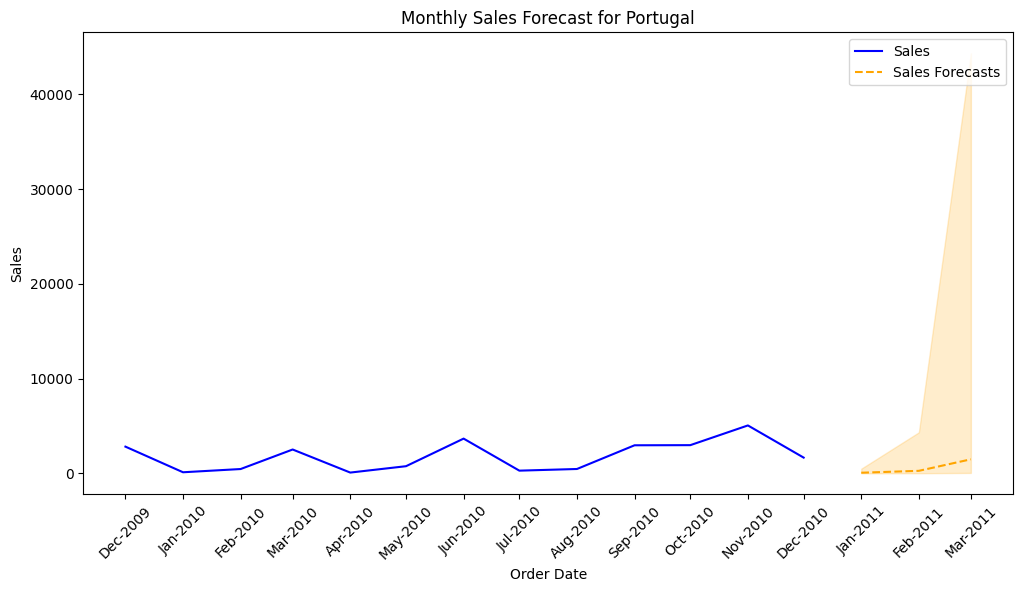

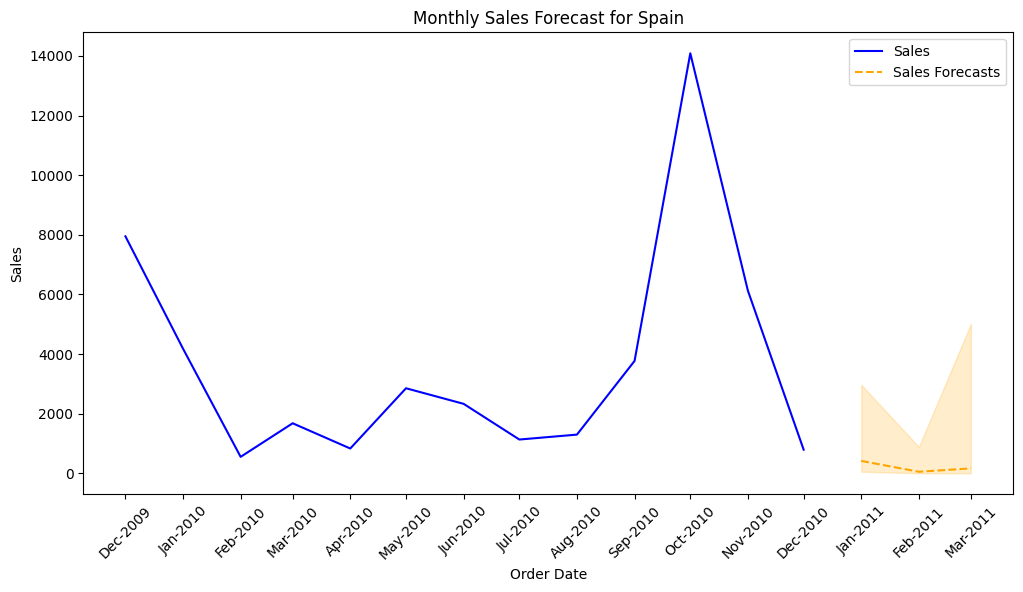

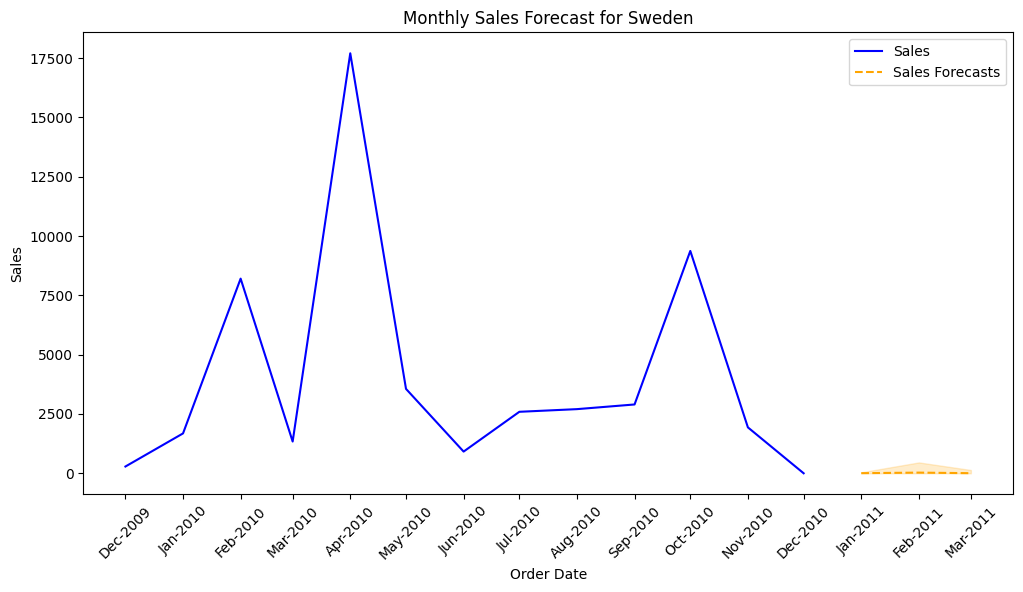

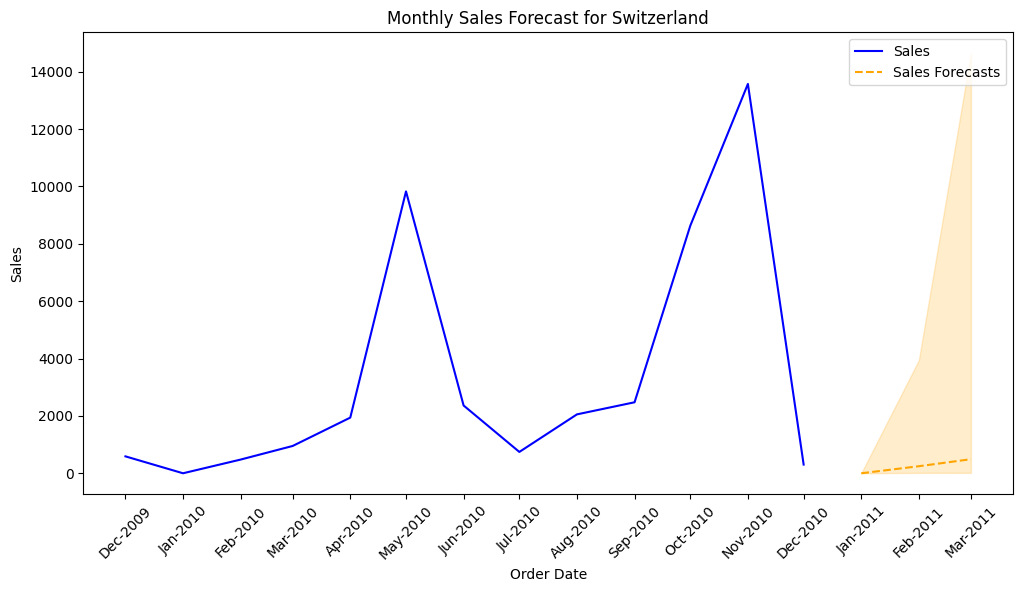

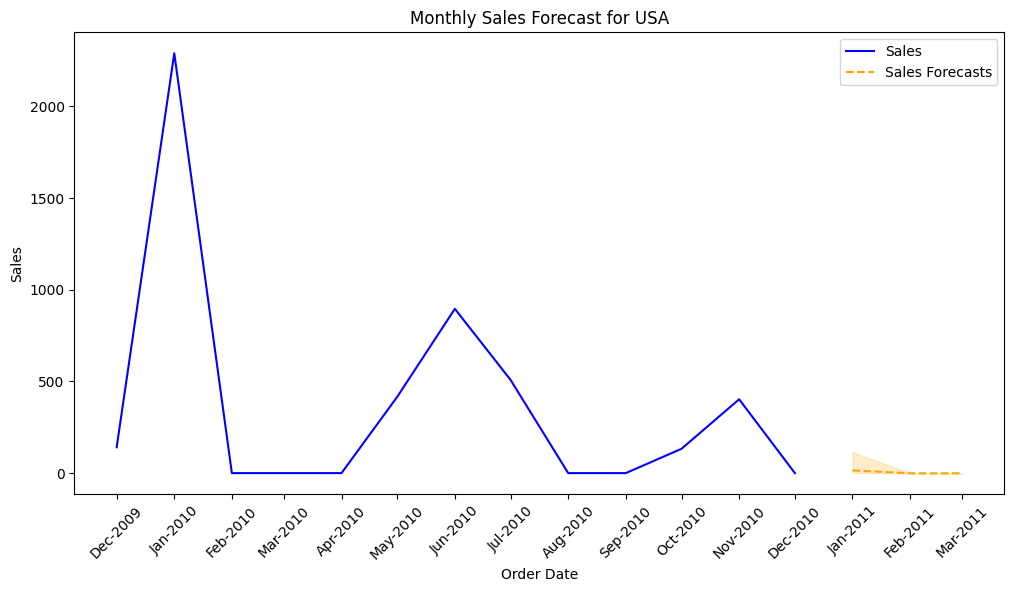

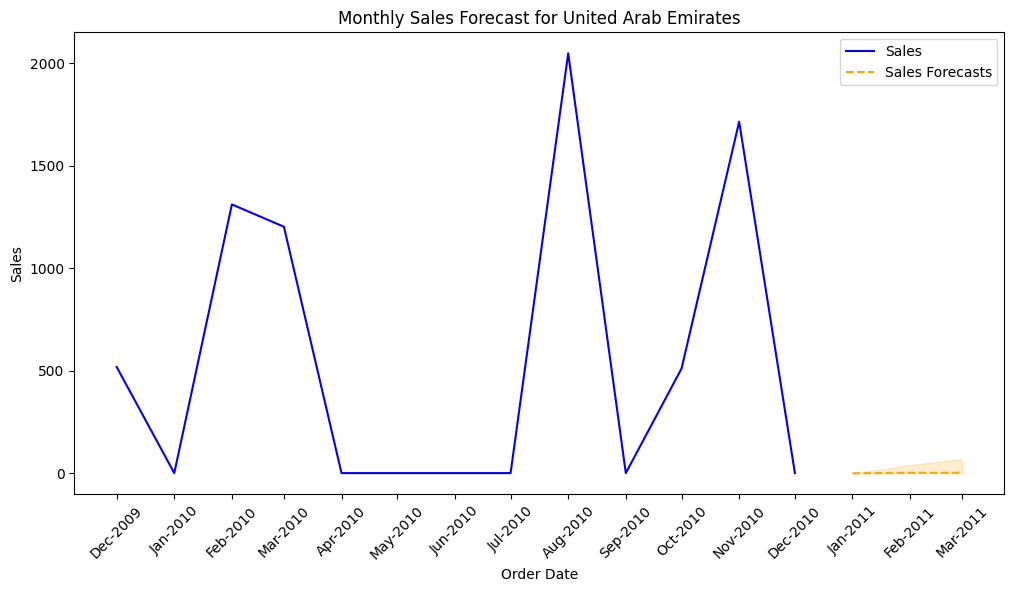

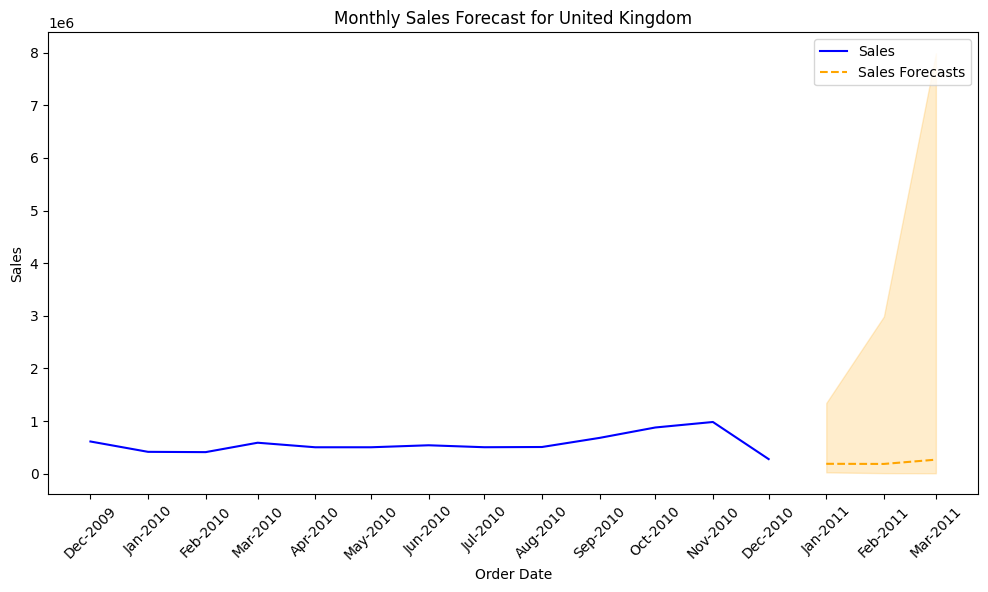

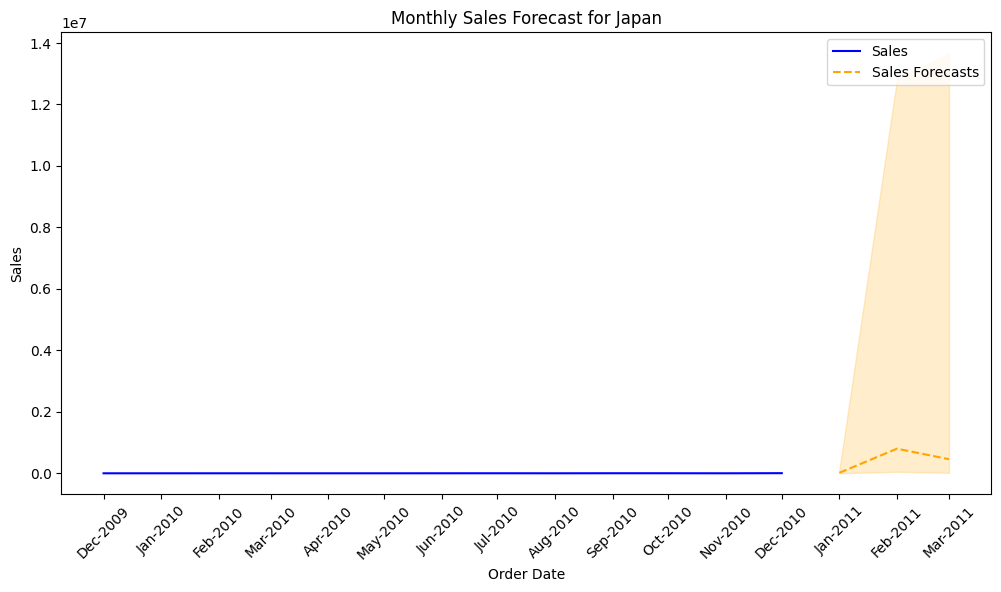

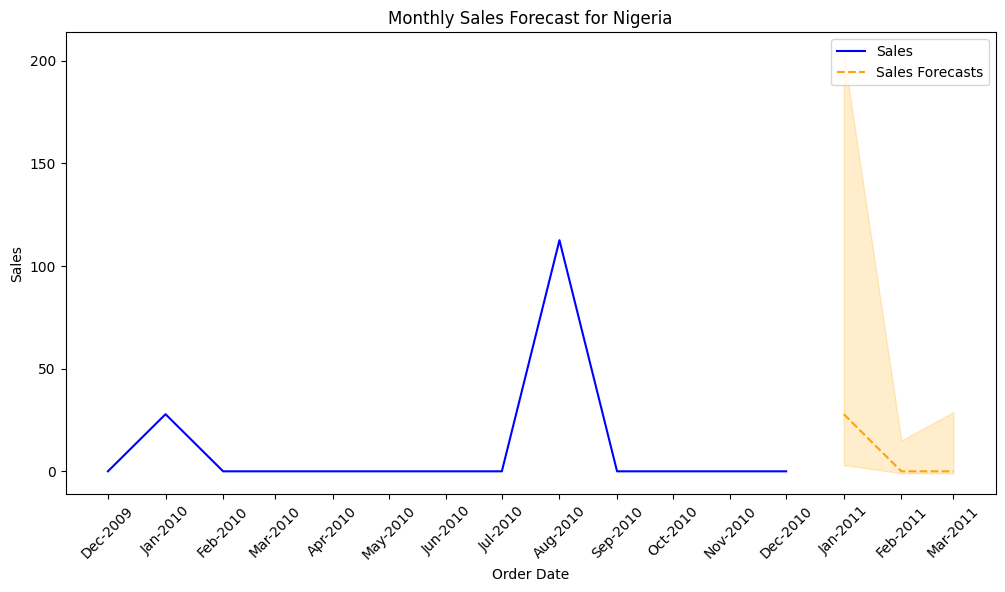

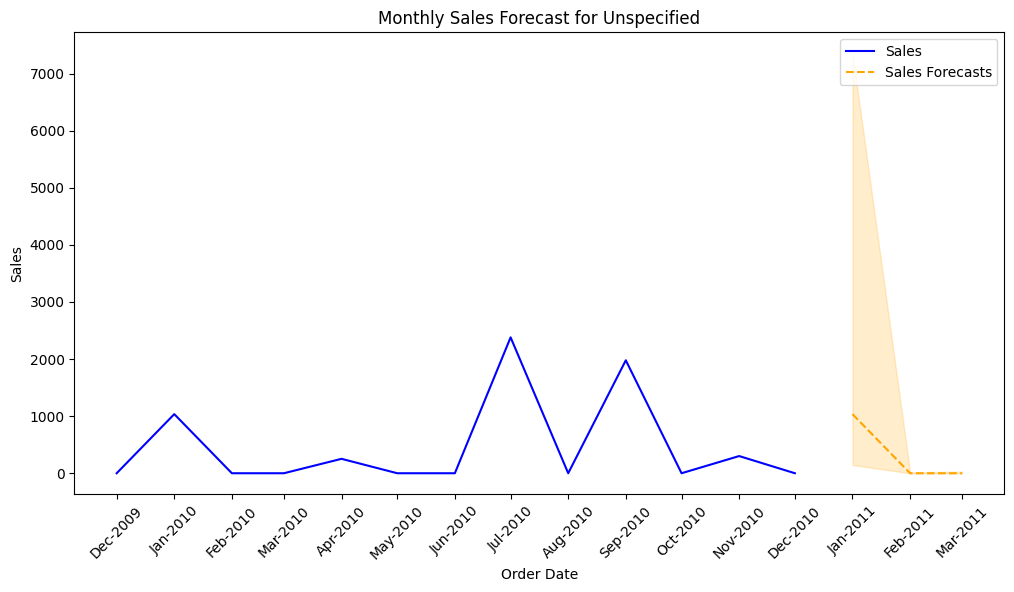

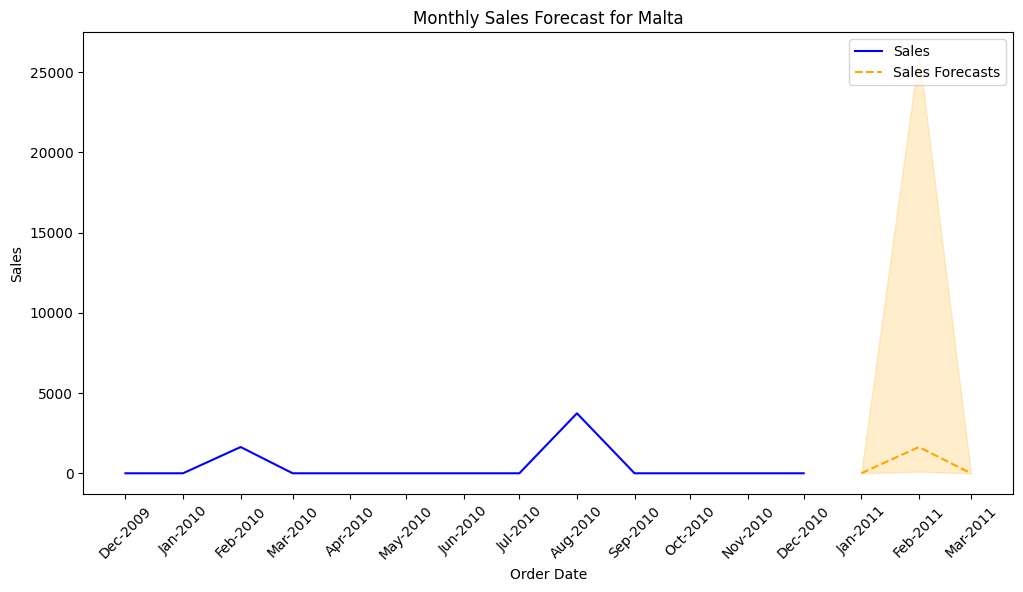

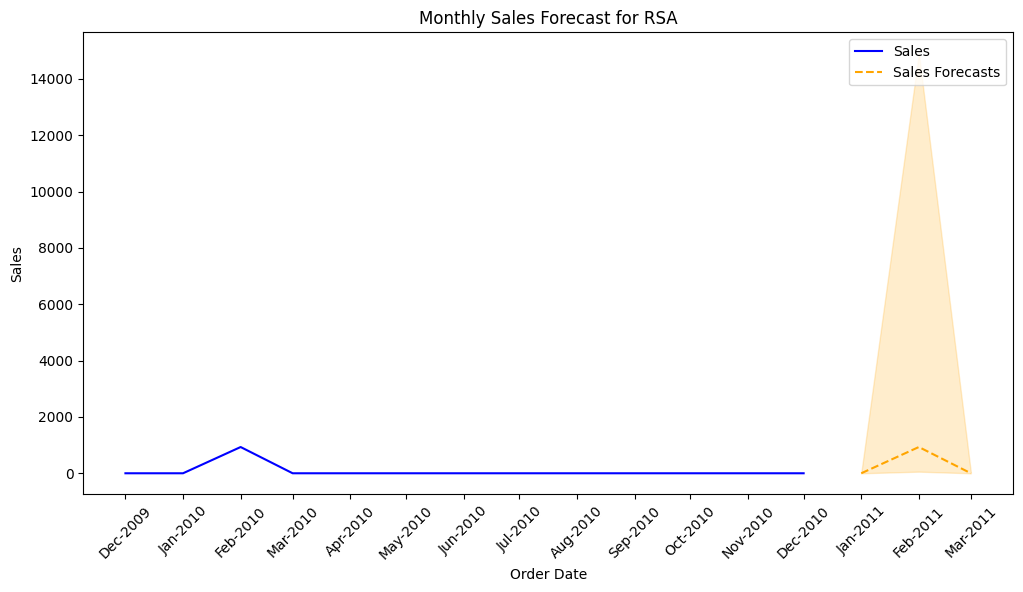

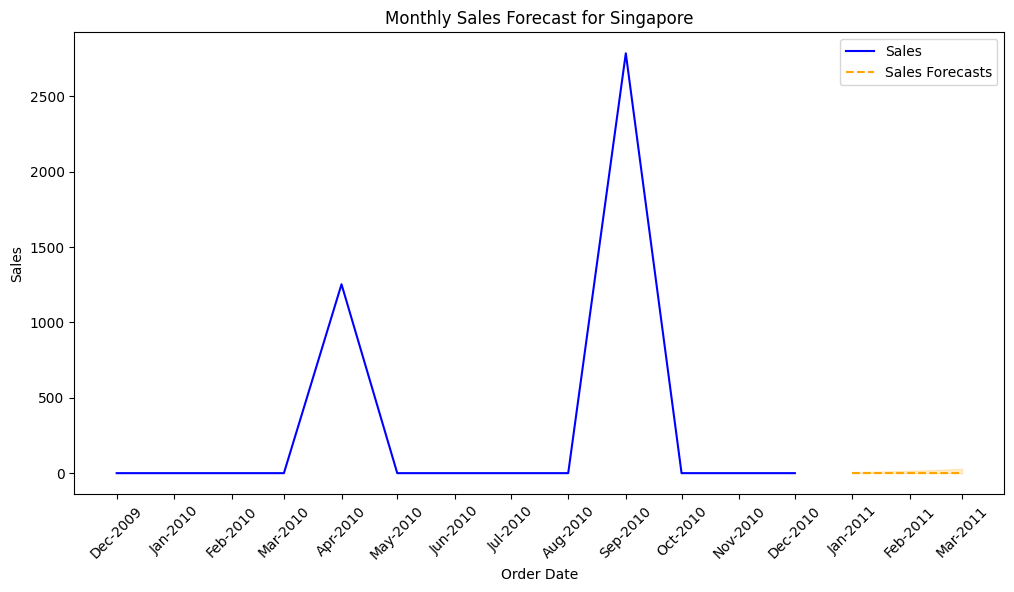

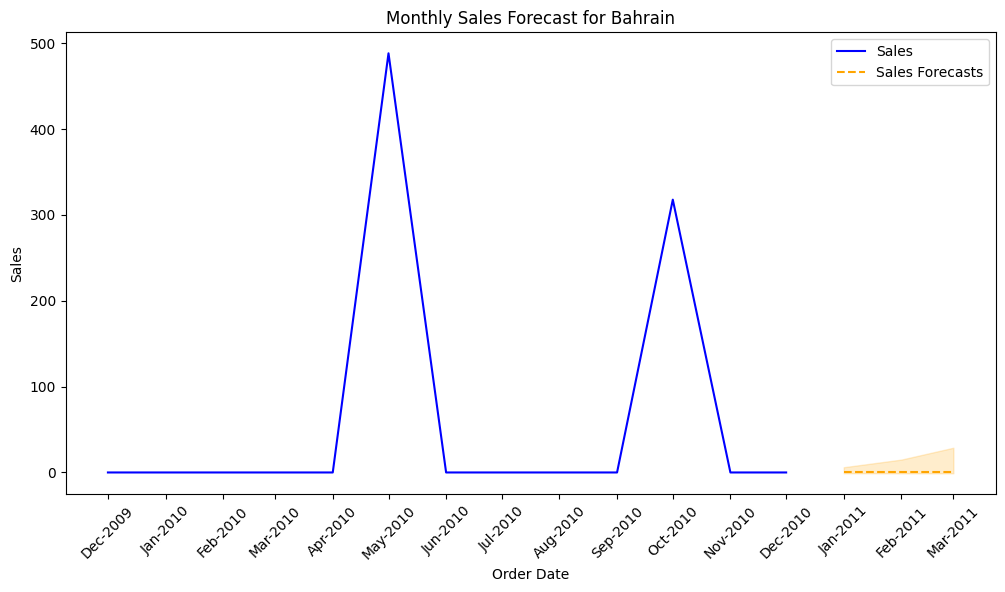

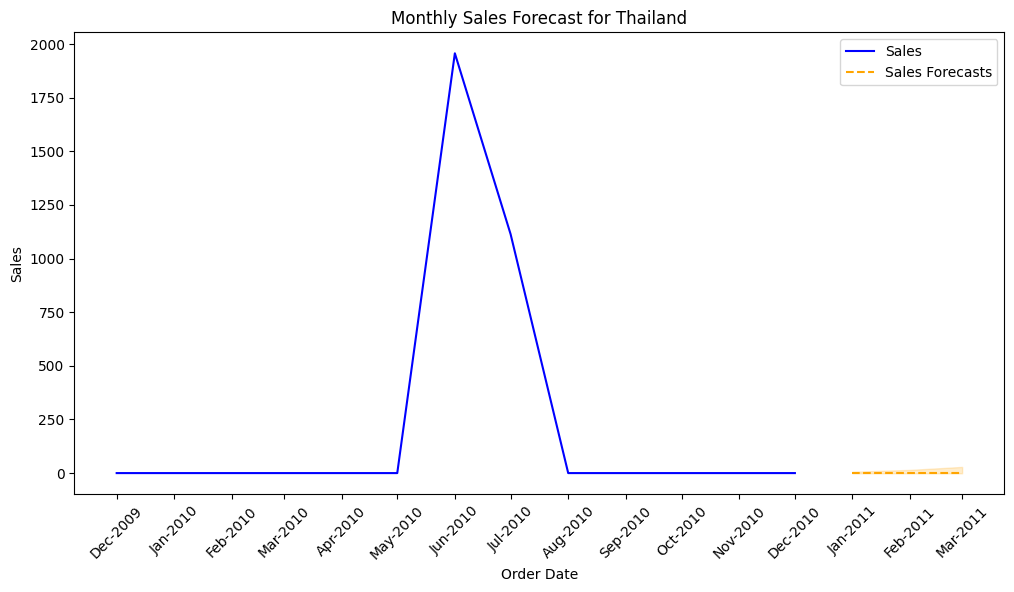

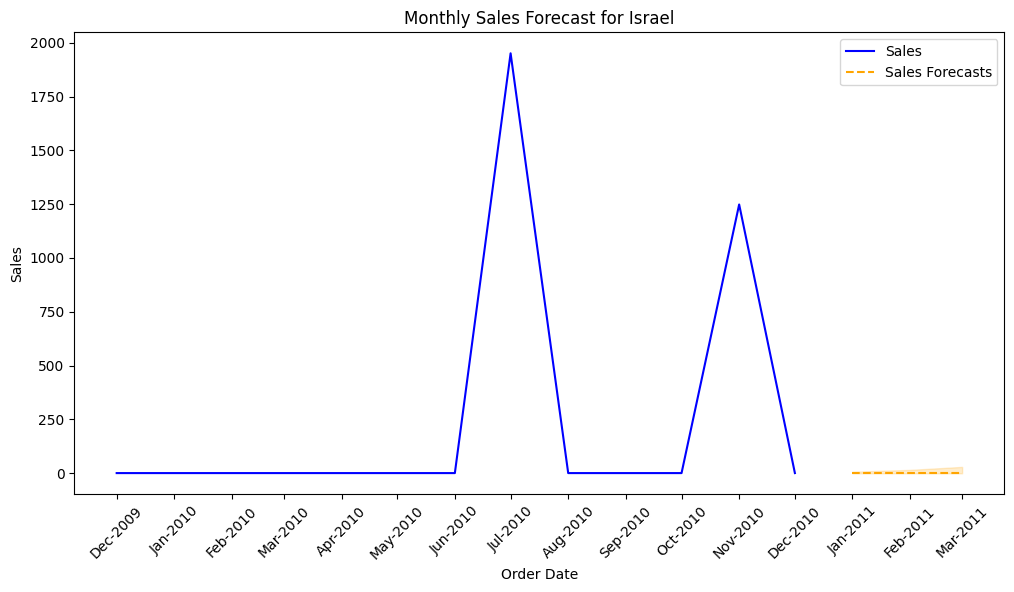

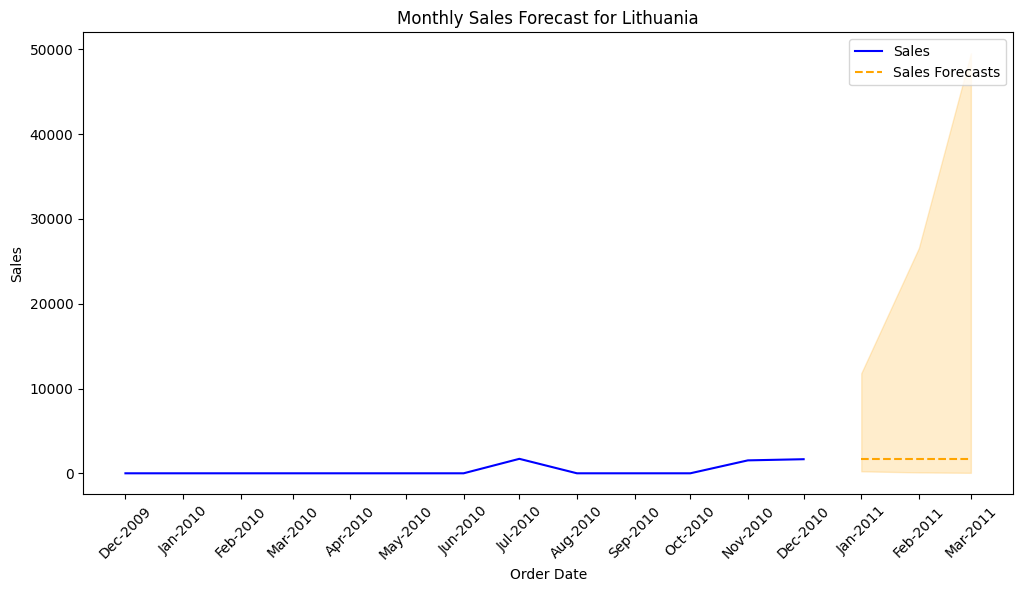

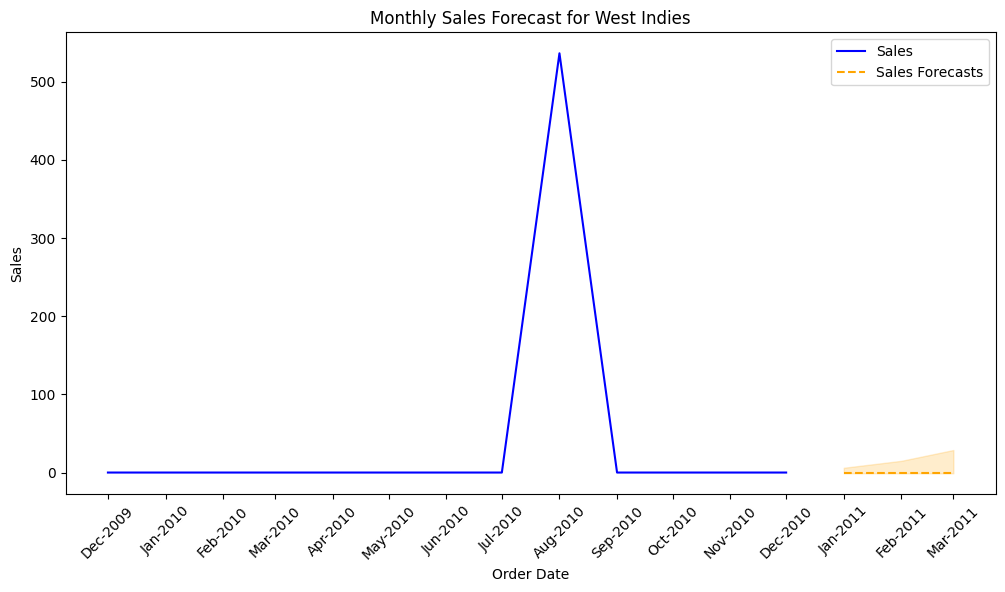

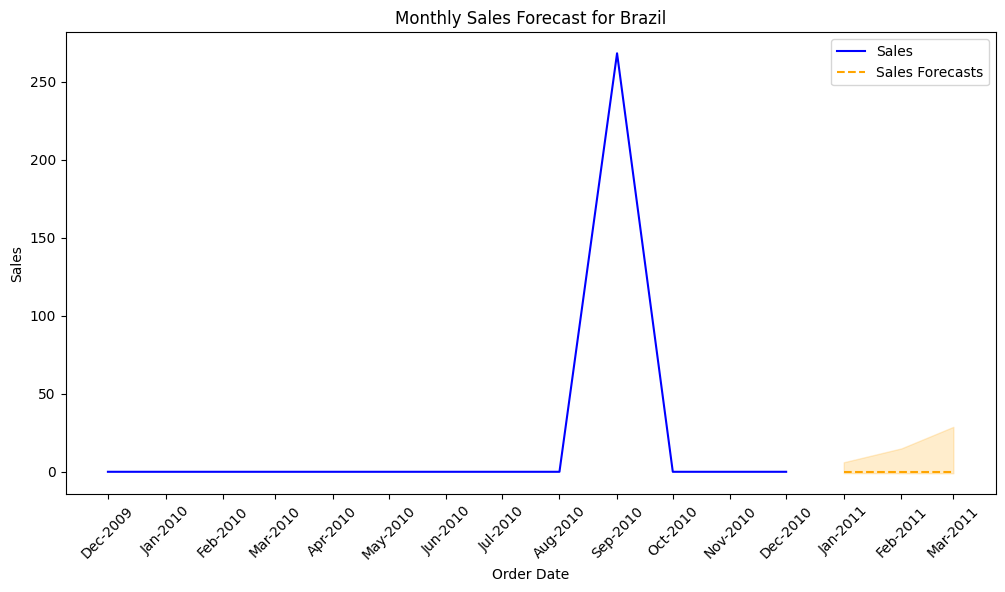

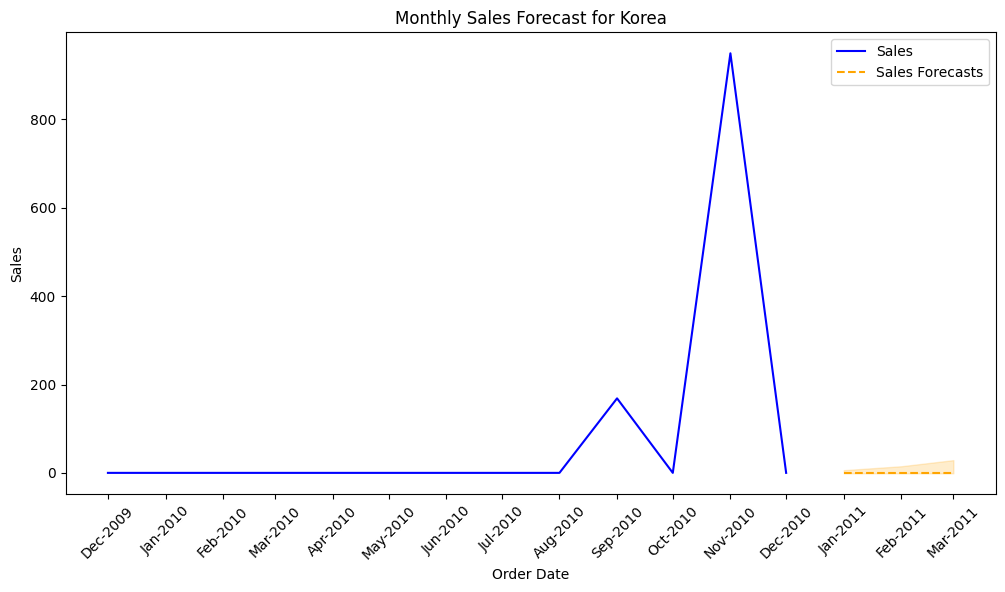

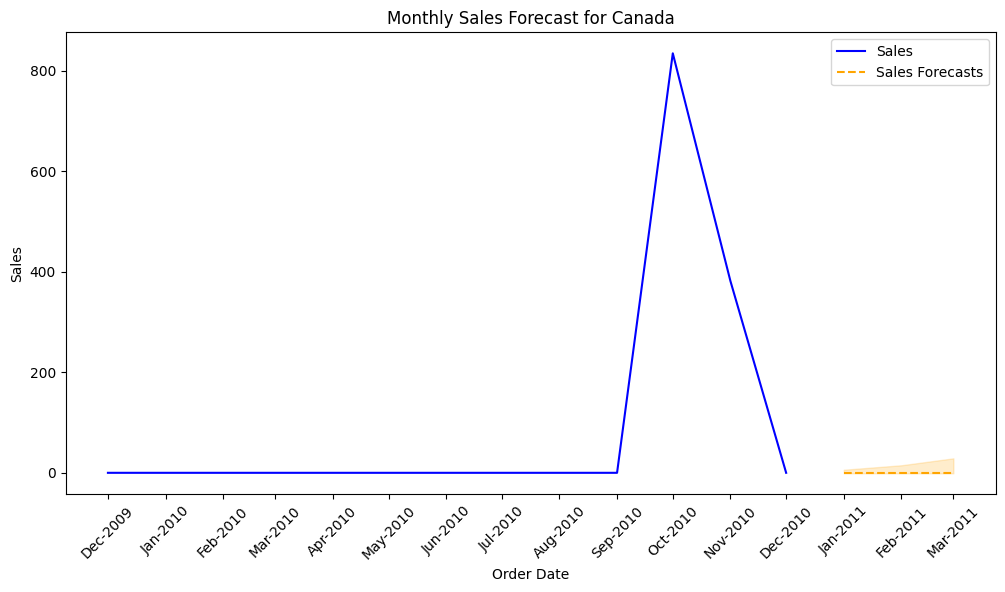

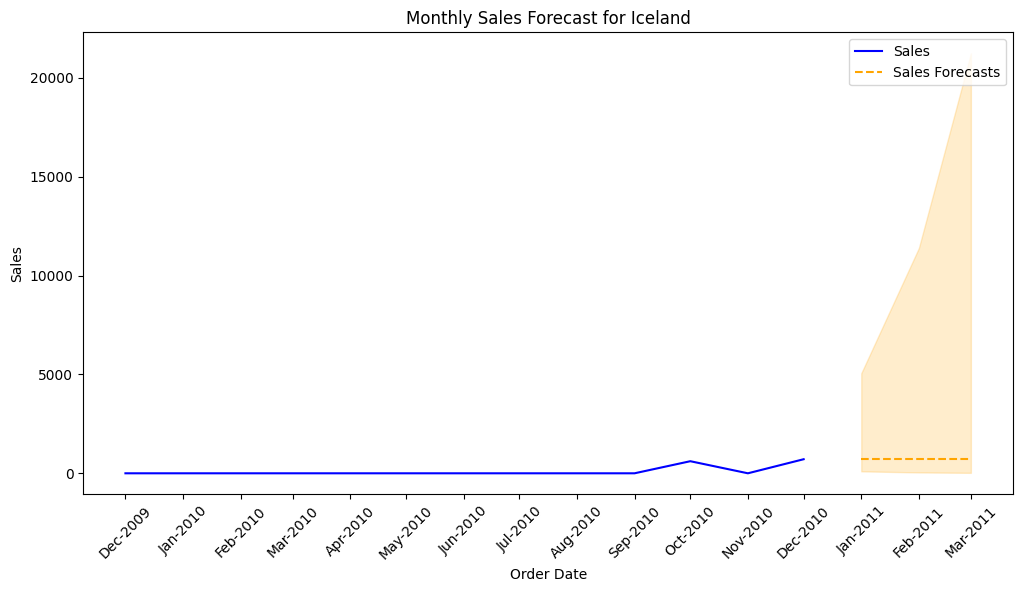

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Plotting results
for country, (historical_data, forecast_data) in forecast_results.items():
    plt.figure(figsize=(12, 6))

    # Plot historical sales in a solid blue line
    plt.plot(historical_data.index, historical_data['Sales'], label='Sales', color='blue')

    # Plot forecasted sales in a dashed orange line
    plt.plot(forecast_data.index, forecast_data['mean'], linestyle='--', color='orange', label='Sales Forecasts')

    # Fill the confidence interval
    plt.fill_between(forecast_data.index, forecast_data['mean_ci_lower'], forecast_data['mean_ci_upper'], color='orange', alpha=0.2)

    # Set x-axis to show all months
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    plt.xticks(rotation=45)

    plt.xlabel('Order Date')
    plt.ylabel('Sales')
    plt.title(f'Monthly Sales Forecast for {country}')
    plt.legend()
    plt.show()


# Retail products

In [ ]:
cleaned_df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country       DATE  \
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom 2009-12-01   
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom 2009-12-01   
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom 2009-12-01   
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom 2009-12-01   
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom 2009-12-01   
...                    ...    ...          ...             ...        ...   
525456 2010-12-09 20:01:00   2.95      17530.0  United Kingdom 2010-12-09   
525457 2010-12-09 20:01:00   3.75      17530.0  United Kingdom 2010-12-09   
525458 2010-12-09 20:01:00   3.75      17530.0  United Kingdom 2010-12-09   
525459 2010-12-09 20:01:00   3.75      17530.0  United Kingdom 2010-12-09   
525460 2010-12-09 20:01:00   1.95      17530.0  United Kingdom 2010-12-09   

         Sales    Month  
0        83.40  2009-12  
1        81.00  2009-12  
2        81.00  2009-12  
3       100.80  2009-12  
4        30.00  2009-12  
...        ...      ...  
525456    5.90  2010-12  
525457    3.75  2010-12  
525458    3.75  2010-12  
525459    7.50  2010-12  
525460    3.90  2010-12  

[407695 rows x 11 columns]

In [ ]:
cleaned_df['StockCode'].value_counts()

StockCode
85123A    3153
85099B    1742
22423     1706
21212     1586
21232     1407
          ... 
62097A       1
20939        1
85069        1
20683        1
22933        1
Name: count, Length: 4017, dtype: int64

In [ ]:
# Create a new DataFrame with the value counts of 'StockCode'
stock_counts_df = cleaned_df['StockCode'].value_counts().reset_index()

# Rename the columns to 'StockCode' and 'Count'
stock_counts_df.columns = ['StockCode', 'Count']

# Display the DataFrame
stock_counts_df

StockCode  Count
0       85123A   3153
1       85099B   1742
2        22423   1706
3        21212   1586
4        21232   1407
...        ...    ...
4012    62097A      1
4013     20939      1
4014     85069      1
4015     20683      1
4016     22933      1

[4017 rows x 2 columns]

In [ ]:
Top20_stock_counts_df= stock_counts_df.head(20)

In [ ]:
Top20_stock_counts_df

StockCode  Count
0     85123A   3153
1     85099B   1742
2      22423   1706
3      21212   1586
4      21232   1407
5      84879   1369
6      20725   1361
7      21754   1219
8      21034   1189
9      84991   1189
10     20914   1089
11     22470   1045
12     22139   1040
13     21733   1032
14    82494L   1029
15     48138   1025
16     22383   1017
17     20727   1012
18     21080    993
19     21755    987

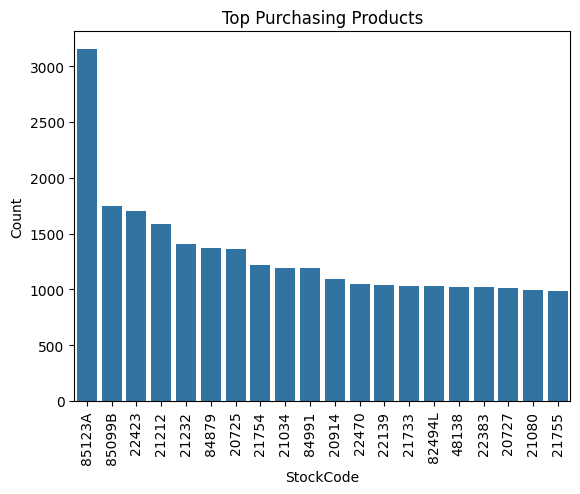

In [ ]:
import seaborn as sns

# Sort the stock_counts_df by Count in descending order
Top20_stock_counts_df = Top20_stock_counts_df.sort_values(by='Count', ascending=False)

# Create a bar plot
sns.barplot(x='StockCode', y='Count', data=Top20_stock_counts_df)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('StockCode')
plt.ylabel('Count')
plt.title('Top Purchasing Products')

# Display the plot
plt.show()

In [ ]:
# Install prophet
!pip install prophet

In [ ]:
# Aggregate daily sales
daily_sales = cleaned_df.groupby(cleaned_df['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
daily_sales.columns = ['ds', 'y']

# Handle outliers
daily_sales['y'] = np.where(daily_sales['y'] > daily_sales['y'].quantile(0.99), daily_sales['y'].quantile(0.99), daily_sales['y'])

In [ ]:
daily_sales

ds        y
0    2009-12-01  24437.0
1    2009-12-02  29783.0
2    2009-12-03  48033.0
3    2009-12-04  20069.0
4    2009-12-05   5119.0
..          ...      ...
302  2010-12-05  16450.0
303  2010-12-06  16291.0
304  2010-12-07  19444.0
305  2010-12-08  21573.0
306  2010-12-09  17415.0

[307 rows x 2 columns]

In [ ]:
from prophet import Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2bnh1jkg/dt_cw0aa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2bnh1jkg/ez4izyrc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71847', 'data', 'file=/tmp/tmp2bnh1jkg/dt_cw0aa.json', 'init=/tmp/tmp2bnh1jkg/ez4izyrc.json', 'output', 'file=/tmp/tmp2bnh1jkg/prophet_modelo377wh2m/prophet_model-20240525142003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


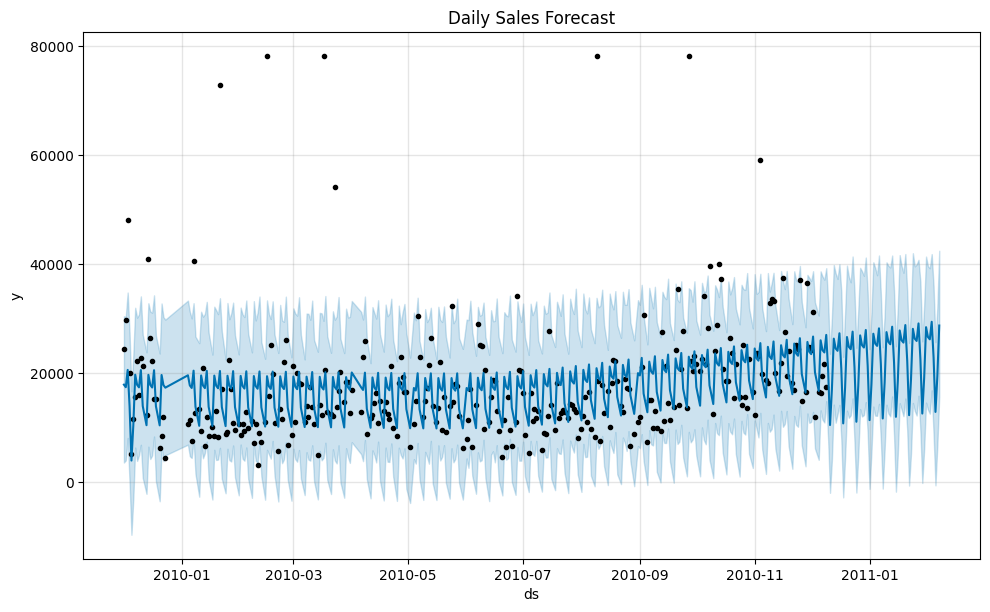

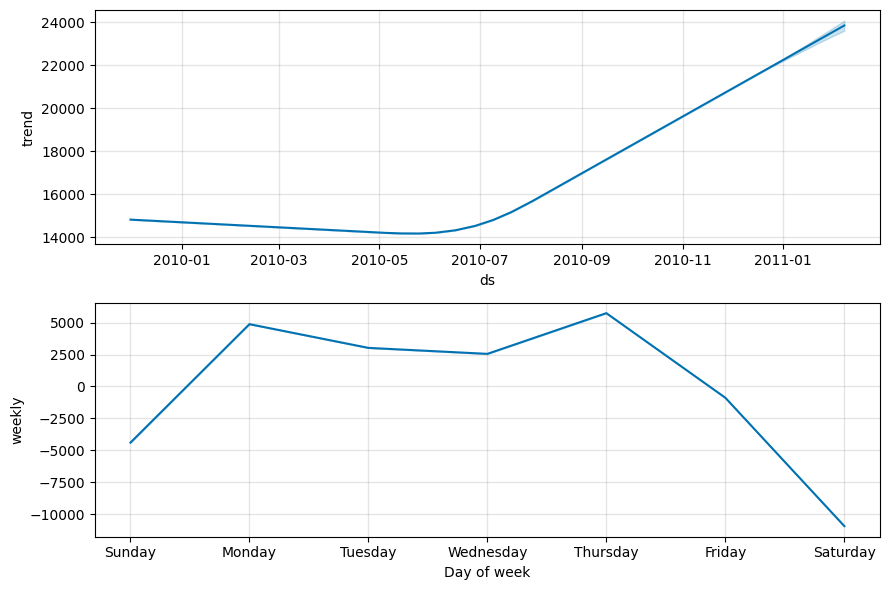

In [ ]:
# Initialize and fit Prophet model
model = Prophet()
model.fit(daily_sales)

# Make future dataframe and forecast
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title('Daily Sales Forecast')
plt.show()

# Plot components
fig2 = model.plot_components(forecast)
plt.show()


In [ ]:

top_products=stock_counts_df.head (10)['StockCode'].tolist()

top_products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['85123A', '85099B', 22423, 21212, 21232, 84879, 20725, 21754, 21034, 84991]

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare data for market basket analysis
basket = (cleaned_df[cleaned_df['StockCode'].isin(top_products)]
          .groupby(['Invoice', 'StockCode'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

# Convert quantities to 1 (present) or 0 (absent)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Calculate ABI index
rules['ABI'] = rules['support'] * len(cleaned_df['Invoice'].unique())

# Filter rules for top products
top_product_rules = rules[rules['antecedents'].apply(lambda x: len(x) == 1 and list(x)[0] in top_products)]
top_product_rules = top_product_rules.sort_values(by='ABI', ascending=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


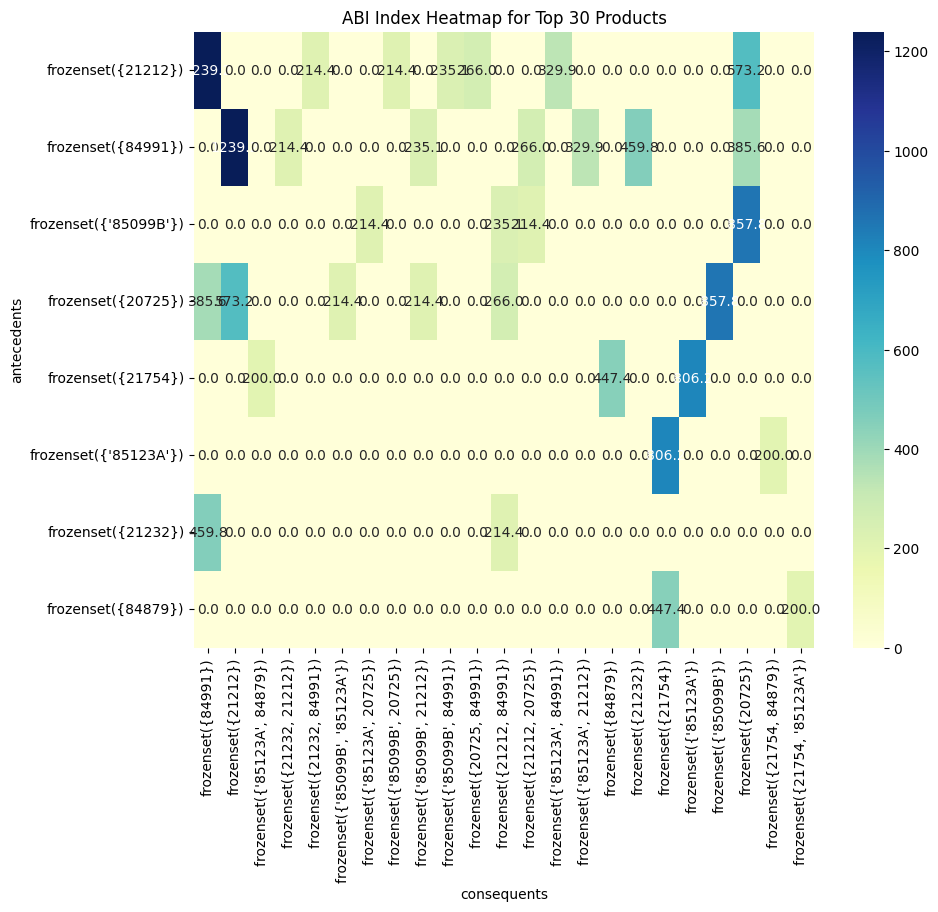

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a matrix for heatmap
abi_matrix = top_product_rules.pivot(index='antecedents', columns='consequents', values='ABI')
abi_matrix.fillna(0, inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(abi_matrix, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('ABI Index Heatmap for Top 30 Products')
plt.show()


# Customer relationship management

In [ ]:
cleaned_df.loc[:,'DATE'] = pd.to_datetime(cleaned_df.loc[:,'DATE'])

In [ ]:
cleaned_df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country       DATE  \
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom 2009-12-01   
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom 2009-12-01   
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom 2009-12-01   
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom 2009-12-01   
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom 2009-12-01   
...                    ...    ...          ...             ...        ...   
525456 2010-12-09 20:01:00   2.95      17530.0  United Kingdom 2010-12-09   
525457 2010-12-09 20:01:00   3.75      17530.0  United Kingdom 2010-12-09   
525458 2010-12-09 20:01:00   3.75      17530.0  United Kingdom 2010-12-09   
525459 2010-12-09 20:01:00   3.75      17530.0  United Kingdom 2010-12-09   
525460 2010-12-09 20:01:00   1.95      17530.0  United Kingdom 2010-12-09   

         Sales    Month  
0        83.40  2009-12  
1        81.00  2009-12  
2        81.00  2009-12  
3       100.80  2009-12  
4        30.00  2009-12  
...        ...      ...  
525456    5.90  2010-12  
525457    3.75  2010-12  
525458    3.75  2010-12  
525459    7.50  2010-12  
525460    3.90  2010-12  

[407695 rows x 11 columns]

In [ ]:
# Convert InvoiceDate to datetime
cleaned_df['InvoiceDate'] = pd.to_datetime(cleaned_df['InvoiceDate'])

# Create MonthYear column for monthly aggregation
cleaned_df['MonthYear'] = cleaned_df['InvoiceDate'].dt.to_period('M')



In [ ]:
from datetime import datetime

# Calculate the snapshot date as the day after the last invoice date in the dataset
snapshot_date = max(cleaned_df.InvoiceDate) + pd.Timedelta(days=15)

rfm_df = cleaned_df.groupby(['Customer ID', 'Country']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
}).reset_index()

# Rename the columns
rfm_df.columns = ['Customer ID', 'Country', 'Recency']

# Define churn as customers who haven't purchased in the last 6 months
rfm_df['Churn'] = rfm_df['Recency'].apply(lambda x: 1 if x > 90 else 0)


In [ ]:
rfm_df

Customer ID         Country  Recency  Churn
0         12346.0  United Kingdom      179      1
1         12347.0         Iceland       17      0
2         12348.0         Finland       88      0
3         12349.0           Italy       57      0
4         12351.0     Unspecified       25      0
...           ...             ...      ...    ...
4314      18283.0  United Kingdom       32      0
4315      18284.0  United Kingdom       81      0
4316      18285.0  United Kingdom      310      1
4317      18286.0  United Kingdom      126      1
4318      18287.0  United Kingdom       32      0

[4319 rows x 4 columns]

In [ ]:
# Aggregate monthly data
monthly_df = cleaned_df.groupby(['Customer ID', 'Country', 'MonthYear']).agg({
    'Invoice': 'nunique',
    'Sales': 'sum'
}).reset_index()

# Merge with RFM data
monthly_df = monthly_df.merge(rfm_df[['Customer ID', 'Country', 'Churn']], on=['Customer ID', 'Country'], how='left')


In [ ]:
monthly_df

Customer ID         Country MonthYear  Invoice    Sales  Churn
0          12346.0  United Kingdom   2009-12        5   113.50      1
1          12346.0  United Kingdom   2010-01        4    90.00      1
2          12346.0  United Kingdom   2010-03        1    27.05      1
3          12346.0  United Kingdom   2010-06        1   142.31      1
4          12347.0         Iceland   2010-10        1   611.53      0
...            ...             ...       ...      ...      ...    ...
13115      18286.0  United Kingdom   2009-12        1   462.95      1
13116      18286.0  United Kingdom   2010-08        1   833.48      1
13117      18287.0  United Kingdom   2010-05        1  1071.61      0
13118      18287.0  United Kingdom   2010-09        2   892.60      0
13119      18287.0  United Kingdom   2010-11        1   381.50      0

[13120 rows x 6 columns]

In [ ]:
# Encode categorical variables
monthly_df = pd.get_dummies(monthly_df, columns=['Country'])

# Split into features and target
X = monthly_df.drop(columns=['Churn', 'Customer ID', 'MonthYear'])
y = monthly_df['Churn']


In [ ]:
monthly_df

Customer ID MonthYear  Invoice    Sales  Churn  Country_Australia  \
0          12346.0   2009-12        5   113.50      1              False   
1          12346.0   2010-01        4    90.00      1              False   
2          12346.0   2010-03        1    27.05      1              False   
3          12346.0   2010-06        1   142.31      1              False   
4          12347.0   2010-10        1   611.53      0              False   
...            ...       ...      ...      ...    ...                ...   
13115      18286.0   2009-12        1   462.95      1              False   
13116      18286.0   2010-08        1   833.48      1              False   
13117      18287.0   2010-05        1  1071.61      0              False   
13118      18287.0   2010-09        2   892.60      0              False   
13119      18287.0   2010-11        1   381.50      0              False   

       Country_Austria  Country_Bahrain  Country_Belgium  Country_Brazil  ...  \
0                False            False            False           False  ...   
1                False            False            False           False  ...   
2                False            False            False           False  ...   
3                False            False            False           False  ...   
4                False            False            False           False  ...   
...                ...              ...              ...             ...  ...   
13115            False            False            False           False  ...   
13116            False            False            False           False  ...   
13117            False            False            False           False  ...   
13118            False            False            False           False  ...   
13119            False            False            False           False  ...   

       Country_Singapore  Country_Spain  Country_Sweden  Country_Switzerland  \
0                  False          False           False                False   
1                  False          False           False                False   
2                  False          False           False                False   
3                  False          False           False                False   
4                  False          False           False                False   
...                  ...            ...             ...                  ...   
13115              False          False           False                False   
13116              False          False           False                False   
13117              False          False           False                False   
13118              False          False           False                False   
13119              False          False           False                False   

       Country_Thailand  Country_USA  Country_United Arab Emirates  \
0                 False        False                         False   
1                 False        False                         False   
2                 False        False                         False   
3                 False        False                         False   
4                 False        False                         False   
...                 ...          ...                           ...   
13115             False        False                         False   
13116             False        False                         False   
13117             False        False                         False   
13118             False        False                         False   
13119             False        False                         False   

       Country_United Kingdom  Country_Unspecified  Country_West Indies  
0                        True                False                False  
1                        True                False                False  
2                        True                False                False  
3                      

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob))


              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2030
           1       0.28      0.27      0.27       594

    accuracy                           0.68      2624
   macro avg       0.54      0.53      0.53      2624
weighted avg       0.67      0.68      0.68      2624

ROC AUC Score: 0.5734085518568277


In [ ]:
# Predict churn probabilities for the entire dataset
monthly_df['Churn_Prob'] = model.predict_proba(X)[:, 1]


In [ ]:
monthly_df

Customer ID MonthYear  Invoice    Sales  Churn  Country_Australia  \
0          12346.0   2009-12        5   113.50      1              False   
1          12346.0   2010-01        4    90.00      1              False   
2          12346.0   2010-03        1    27.05      1              False   
3          12346.0   2010-06        1   142.31      1              False   
4          12347.0   2010-10        1   611.53      0              False   
...            ...       ...      ...      ...    ...                ...   
13115      18286.0   2009-12        1   462.95      1              False   
13116      18286.0   2010-08        1   833.48      1              False   
13117      18287.0   2010-05        1  1071.61      0              False   
13118      18287.0   2010-09        2   892.60      0              False   
13119      18287.0   2010-11        1   381.50      0              False   

       Country_Austria  Country_Bahrain  Country_Belgium  Country_Brazil  ...  \
0                False            False            False           False  ...   
1                False            False            False           False  ...   
2                False            False            False           False  ...   
3                False            False            False           False  ...   
4                False            False            False           False  ...   
...                ...              ...              ...             ...  ...   
13115            False            False            False           False  ...   
13116            False            False            False           False  ...   
13117            False            False            False           False  ...   
13118            False            False            False           False  ...   
13119            False            False            False           False  ...   

       Country_Spain  Country_Sweden  Country_Switzerland  Country_Thailand  \
0              False           False                False             False   
1              False           False                False             False   
2              False           False                False             False   
3              False           False                False             False   
4              False           False                False             False   
...              ...             ...                  ...               ...   
13115          False           False                False             False   
13116          False           False                False             False   
13117          False           False                False             False   
13118          False           False                False             False   
13119          False           False                False             False   

       Country_USA  Country_United Arab Emirates  Country_United Kingdom  \
0            False                         False                    True   
1            False                         False                    True   
2            False                         False                    True   
3            False                         False                    True   
4            False                         False                   False   
...            ...                           ...                     ...   
13115        False                         False                    True   
13116        False                         False                    True   
13117        False                         False                    True   
13118        False                         False                    True   
13119        False                         False                    True   

       Country_Unspecified  Country_West Indies  Churn_Prob  
0                    False                False        0.20  
1                    False                False        0.78  
2                    False                False        0.66  
3          

In [ ]:
import pandas as pd

# Ensure the 'MonthYear' column is in datetime format
monthly_df['MonthYear'] = monthly_df['MonthYear'].astype(str)
monthly_df['MonthYear'] = pd.to_datetime(monthly_df['MonthYear'], format='%Y-%m')


In [ ]:

monthly_df

Customer ID  MonthYear  Invoice    Sales  Churn  Country_Australia  \
0          12346.0 2009-12-01        5   113.50      1              False   
1          12346.0 2010-01-01        4    90.00      1              False   
2          12346.0 2010-03-01        1    27.05      1              False   
3          12346.0 2010-06-01        1   142.31      1              False   
4          12347.0 2010-10-01        1   611.53      0              False   
...            ...        ...      ...      ...    ...                ...   
13115      18286.0 2009-12-01        1   462.95      1              False   
13116      18286.0 2010-08-01        1   833.48      1              False   
13117      18287.0 2010-05-01        1  1071.61      0              False   
13118      18287.0 2010-09-01        2   892.60      0              False   
13119      18287.0 2010-11-01        1   381.50      0              False   

       Country_Austria  Country_Bahrain  Country_Belgium  Country_Brazil  ...  \
0                False            False            False           False  ...   
1                False            False            False           False  ...   
2                False            False            False           False  ...   
3                False            False            False           False  ...   
4                False            False            False           False  ...   
...                ...              ...              ...             ...  ...   
13115            False            False            False           False  ...   
13116            False            False            False           False  ...   
13117            False            False            False           False  ...   
13118            False            False            False           False  ...   
13119            False            False            False           False  ...   

       Country_Spain  Country_Sweden  Country_Switzerland  Country_Thailand  \
0              False           False                False             False   
1              False           False                False             False   
2              False           False                False             False   
3              False           False                False             False   
4              False           False                False             False   
...              ...             ...                  ...               ...   
13115          False           False                False             False   
13116          False           False                False             False   
13117          False           False                False             False   
13118          False           False                False             False   
13119          False           False                False             False   

       Country_USA  Country_United Arab Emirates  Country_United Kingdom  \
0            False                         False                    True   
1            False                         False                    True   
2            False                         False                    True   
3            False                         False                    True   
4            False                         False                   False   
...            ...                           ...                     ...   
13115        False                         False                    True   
13116        False                         False                    True   
13117        False                         False                    True   
13118        False                         False                    True   
13119        False                         False                    True   

       Country_Unspecified  Country_West Indies  Churn_Prob  
0                    False                False        0.20  
1                    False                False        0.78  
2                    False                False        0.66  

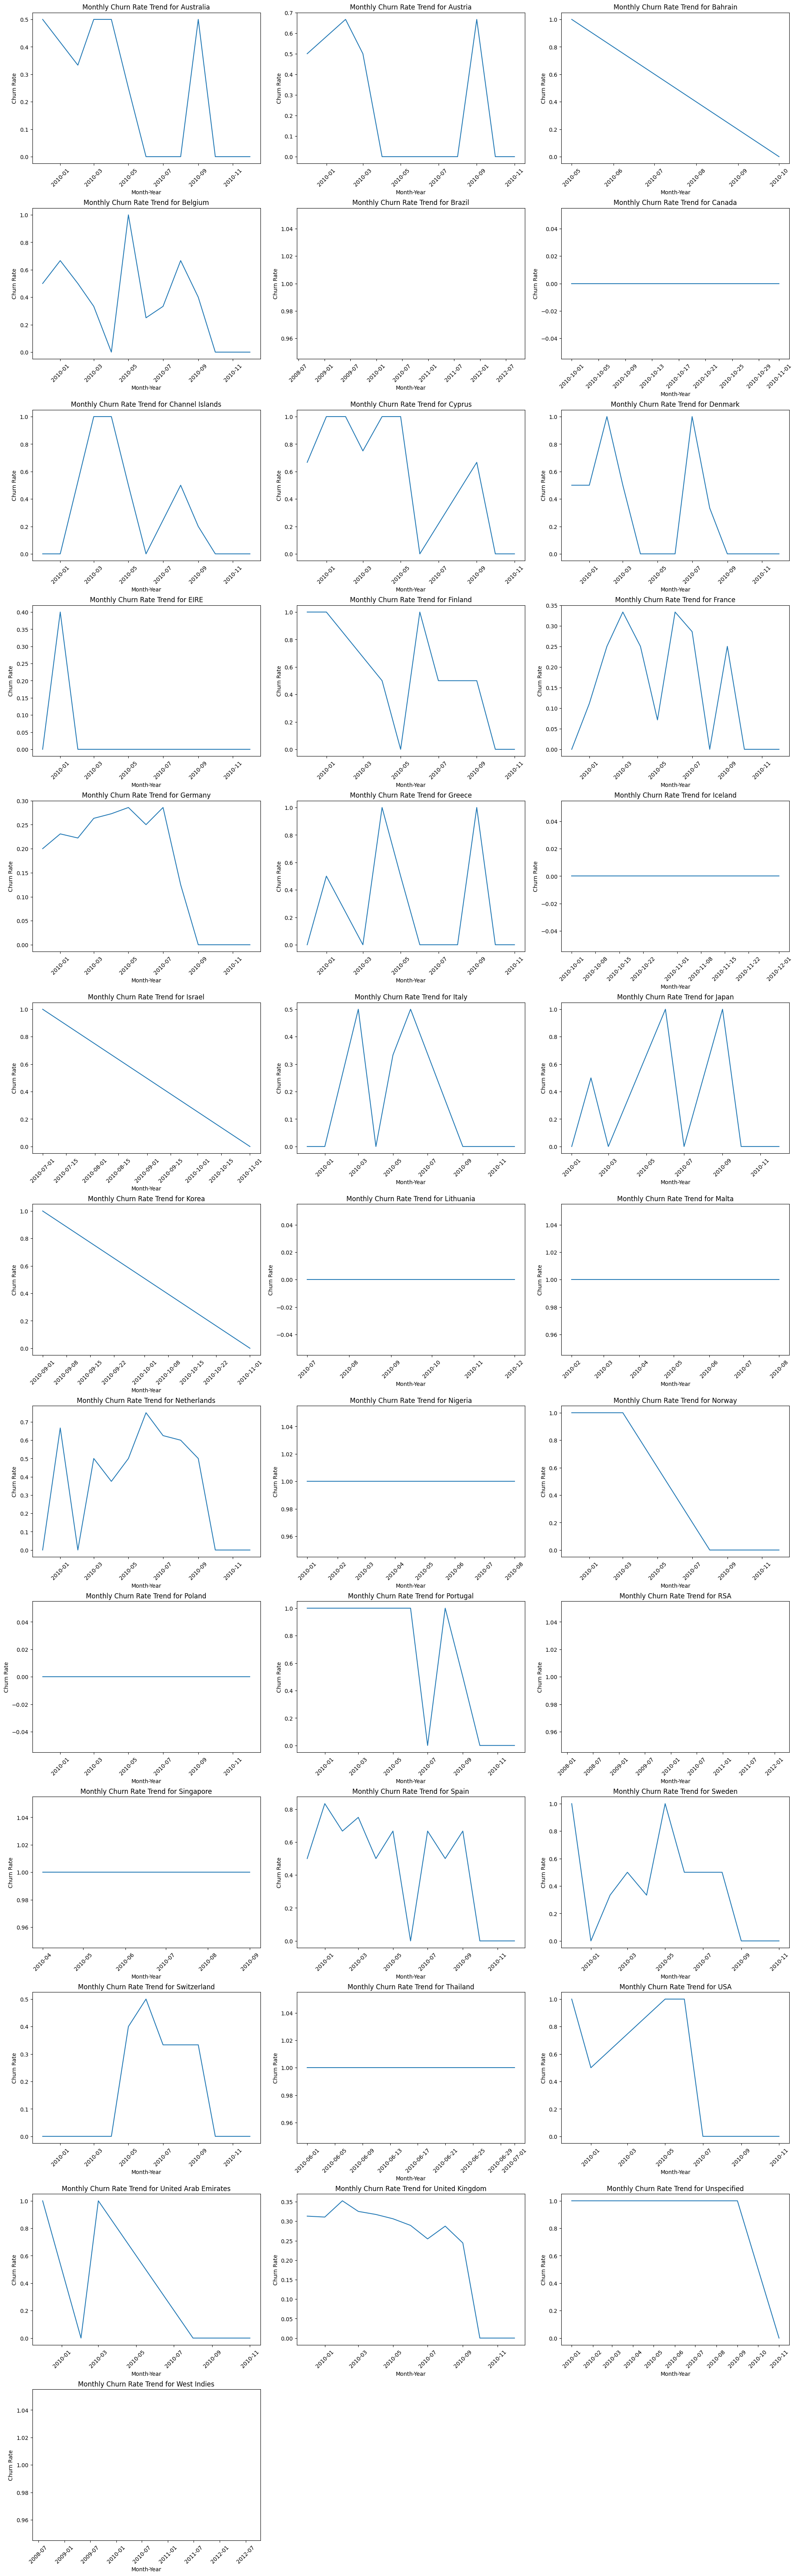

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get a list of unique countries
unique_countries = [col.replace('Country_', '') for col in monthly_df.columns if col.startswith('Country_')]

# Determine the grid size for subplots
num_countries = len(unique_countries)
cols = 3  # Number of columns in the subplot grid
rows = math.ceil(num_countries / cols)  # Calculate the number of rows needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each country and plot the churn rate
for idx, country in enumerate(unique_countries):
    # Filter the data for the specific country
    country_df = monthly_df[monthly_df['Country_' + country] == 1]

    # Calculate monthly churn rate
    monthly_churn_rate = country_df.groupby('MonthYear')['Churn'].mean().reset_index()

    # Plot monthly churn rate trend
    sns.lineplot(data=monthly_churn_rate, x='MonthYear', y='Churn', ax=axes[idx])
    axes[idx].set_title(f'Monthly Churn Rate Trend for {country}')
    axes[idx].set_xlabel('Month-Year')
    axes[idx].set_ylabel('Churn Rate')
    axes[idx].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for idx in range(num_countries, len(axes)):
    fig.delaxes(axes[idx])

plt.show()
